# Supervised Learning

Dataset available in the repo. 
Also, here is a link to that dataset : https://www.kaggle.com/mohansacharya/graduate-admissions

Topics covered are : Linear Regression, Lasso Regression, Ridge Regression, Logistic Regression with ROC Curves, KNeighborsClassifier and RandomForestRegressor

Importin dependencies

In [101]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
sns.set_style("darkgrid")

In [102]:
#reading the csv file
data = pd.read_csv("Admission_Predict.csv")

Performing some exploratory data analysis

In [103]:
#data description
data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

In [104]:
#checking the first 5 rows
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [105]:
#making the serial number the index
data = data.set_index("Serial No.")

In [106]:
#checking the last few lines
data.tail()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
496               332          108                  5  4.5   4.0  9.02   
497               337          117                  5  5.0   5.0  9.87   
498               330          120                  5  4.5   5.0  9.56   
499               312          103                  4  4.0   5.0  8.43   
500               327          113                  4  4.5   4.5  9.04   

            Research  Chance of Admit   
Serial No.                              
496                1              0.87  
497                1              0.96  
498                1              0.93  
499                0              0.73  
500                0              0.84

In [107]:
#checking the shape of the dataframe and the columns
print(data.shape)
print()
print(data.columns)

(500, 8)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [108]:
#renaming the columns
data = data.rename(columns = {'Serial No.' : 'Sno', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'UniRating', 'Chance of Admit':'Chance'})

In [109]:
#checking the first 5 rows again
data.head()

GRE  TOEFL  UniRating  SOP  LOR   CGPA  Research  Chance of Admit 
Serial No.                                                                    
1           337    118          4  4.5   4.5  9.65         1              0.92
2           324    107          4  4.0   4.5  8.87         1              0.76
3           316    104          3  3.0   3.5  8.00         1              0.72
4           322    110          3  3.5   2.5  8.67         1              0.80
5           314    103          2  2.0   3.0  8.21         0              0.65

In [110]:
#checking the null values
data.isnull().sum()

GRE                 0
TOEFL               0
UniRating           0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

In [111]:
#checking the information of the dataframe once again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE               500 non-null    int64  
 1   TOEFL             500 non-null    int64  
 2   UniRating         500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   Chance of Admit   500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [112]:
#we need to change the dtype of research as category
data['Research'] = data['Research'].astype('category')
data = data.rename(columns={'Chance of Admit ' : 'Chance'})

In [113]:
#checking the dtypes now
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GRE        500 non-null    int64   
 1   TOEFL      500 non-null    int64   
 2   UniRating  500 non-null    int64   
 3   SOP        500 non-null    float64 
 4   LOR        500 non-null    float64 
 5   CGPA       500 non-null    float64 
 6   Research   500 non-null    category
 7   Chance     500 non-null    float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 31.8 KB


Visualizing some distributions to better understand the data

Text(0.5, 1.0, 'Distribution of the GRE scores.')

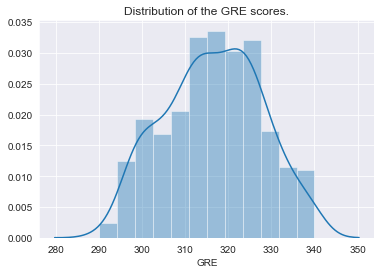

In [114]:
sns.distplot(data['GRE'])
plt.title("Distribution of the GRE scores.")

Text(0.5, 1.0, 'Distribution of the TOEFL scores.')

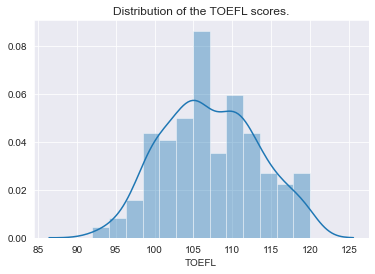

In [115]:
sns.distplot(data['TOEFL'])
plt.title("Distribution of the TOEFL scores.")

Text(0.5, 1.0, 'Distribution of the CGPAs.')

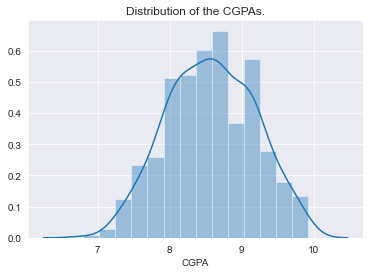

In [116]:
sns.distplot(data['CGPA'])
plt.title("Distribution of the CGPAs.")

Text(0.5, 1.0, 'Number of students who have done some research.')

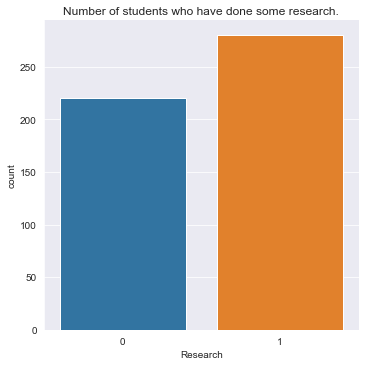

In [117]:
sns.catplot(x='Research', data=data, kind='count')
plt.title("Number of students who have done some research.")

We saw that students with variety of marks have applied for admissions.

Let's continue with the visualizations!

In [118]:
#Now we are interested in relationships between different variables

Text(0.5, 1.0, 'CGPA vs GRE Scores')

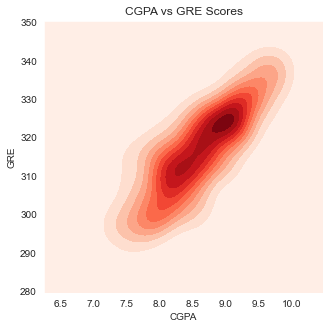

In [119]:
f, ax = plt.subplots(figsize=(5,5))
ax = sns.kdeplot(data.CGPA, data.GRE, cmap="Reds", shade=True)
plt.title("CGPA vs GRE Scores")

Text(0.5, 1.0, 'CGPA vs TOEFL Scores')

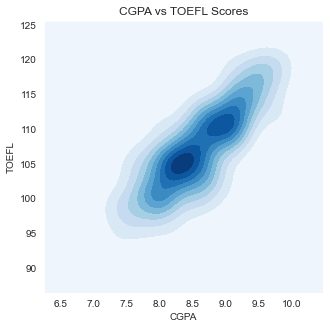

In [120]:
f, ax = plt.subplots(figsize=(5,5))
ax = sns.kdeplot(data.CGPA, data.TOEFL, cmap="Blues", shade=True)
plt.title("CGPA vs TOEFL Scores")

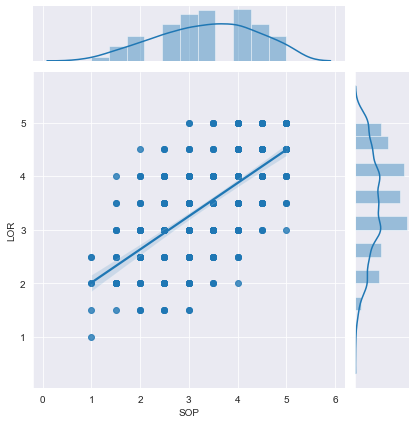

In [121]:
data = data.rename(columns={'LOR ':'LOR'})
ax = sns.jointplot(data.SOP, data.LOR,  kind='reg')

In [122]:
data.columns

Index(['GRE', 'TOEFL', 'UniRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [123]:
data.head()
x = data.loc[:,:]

Text(0.5, 1.0, 'Correlation of the variables with themselves')

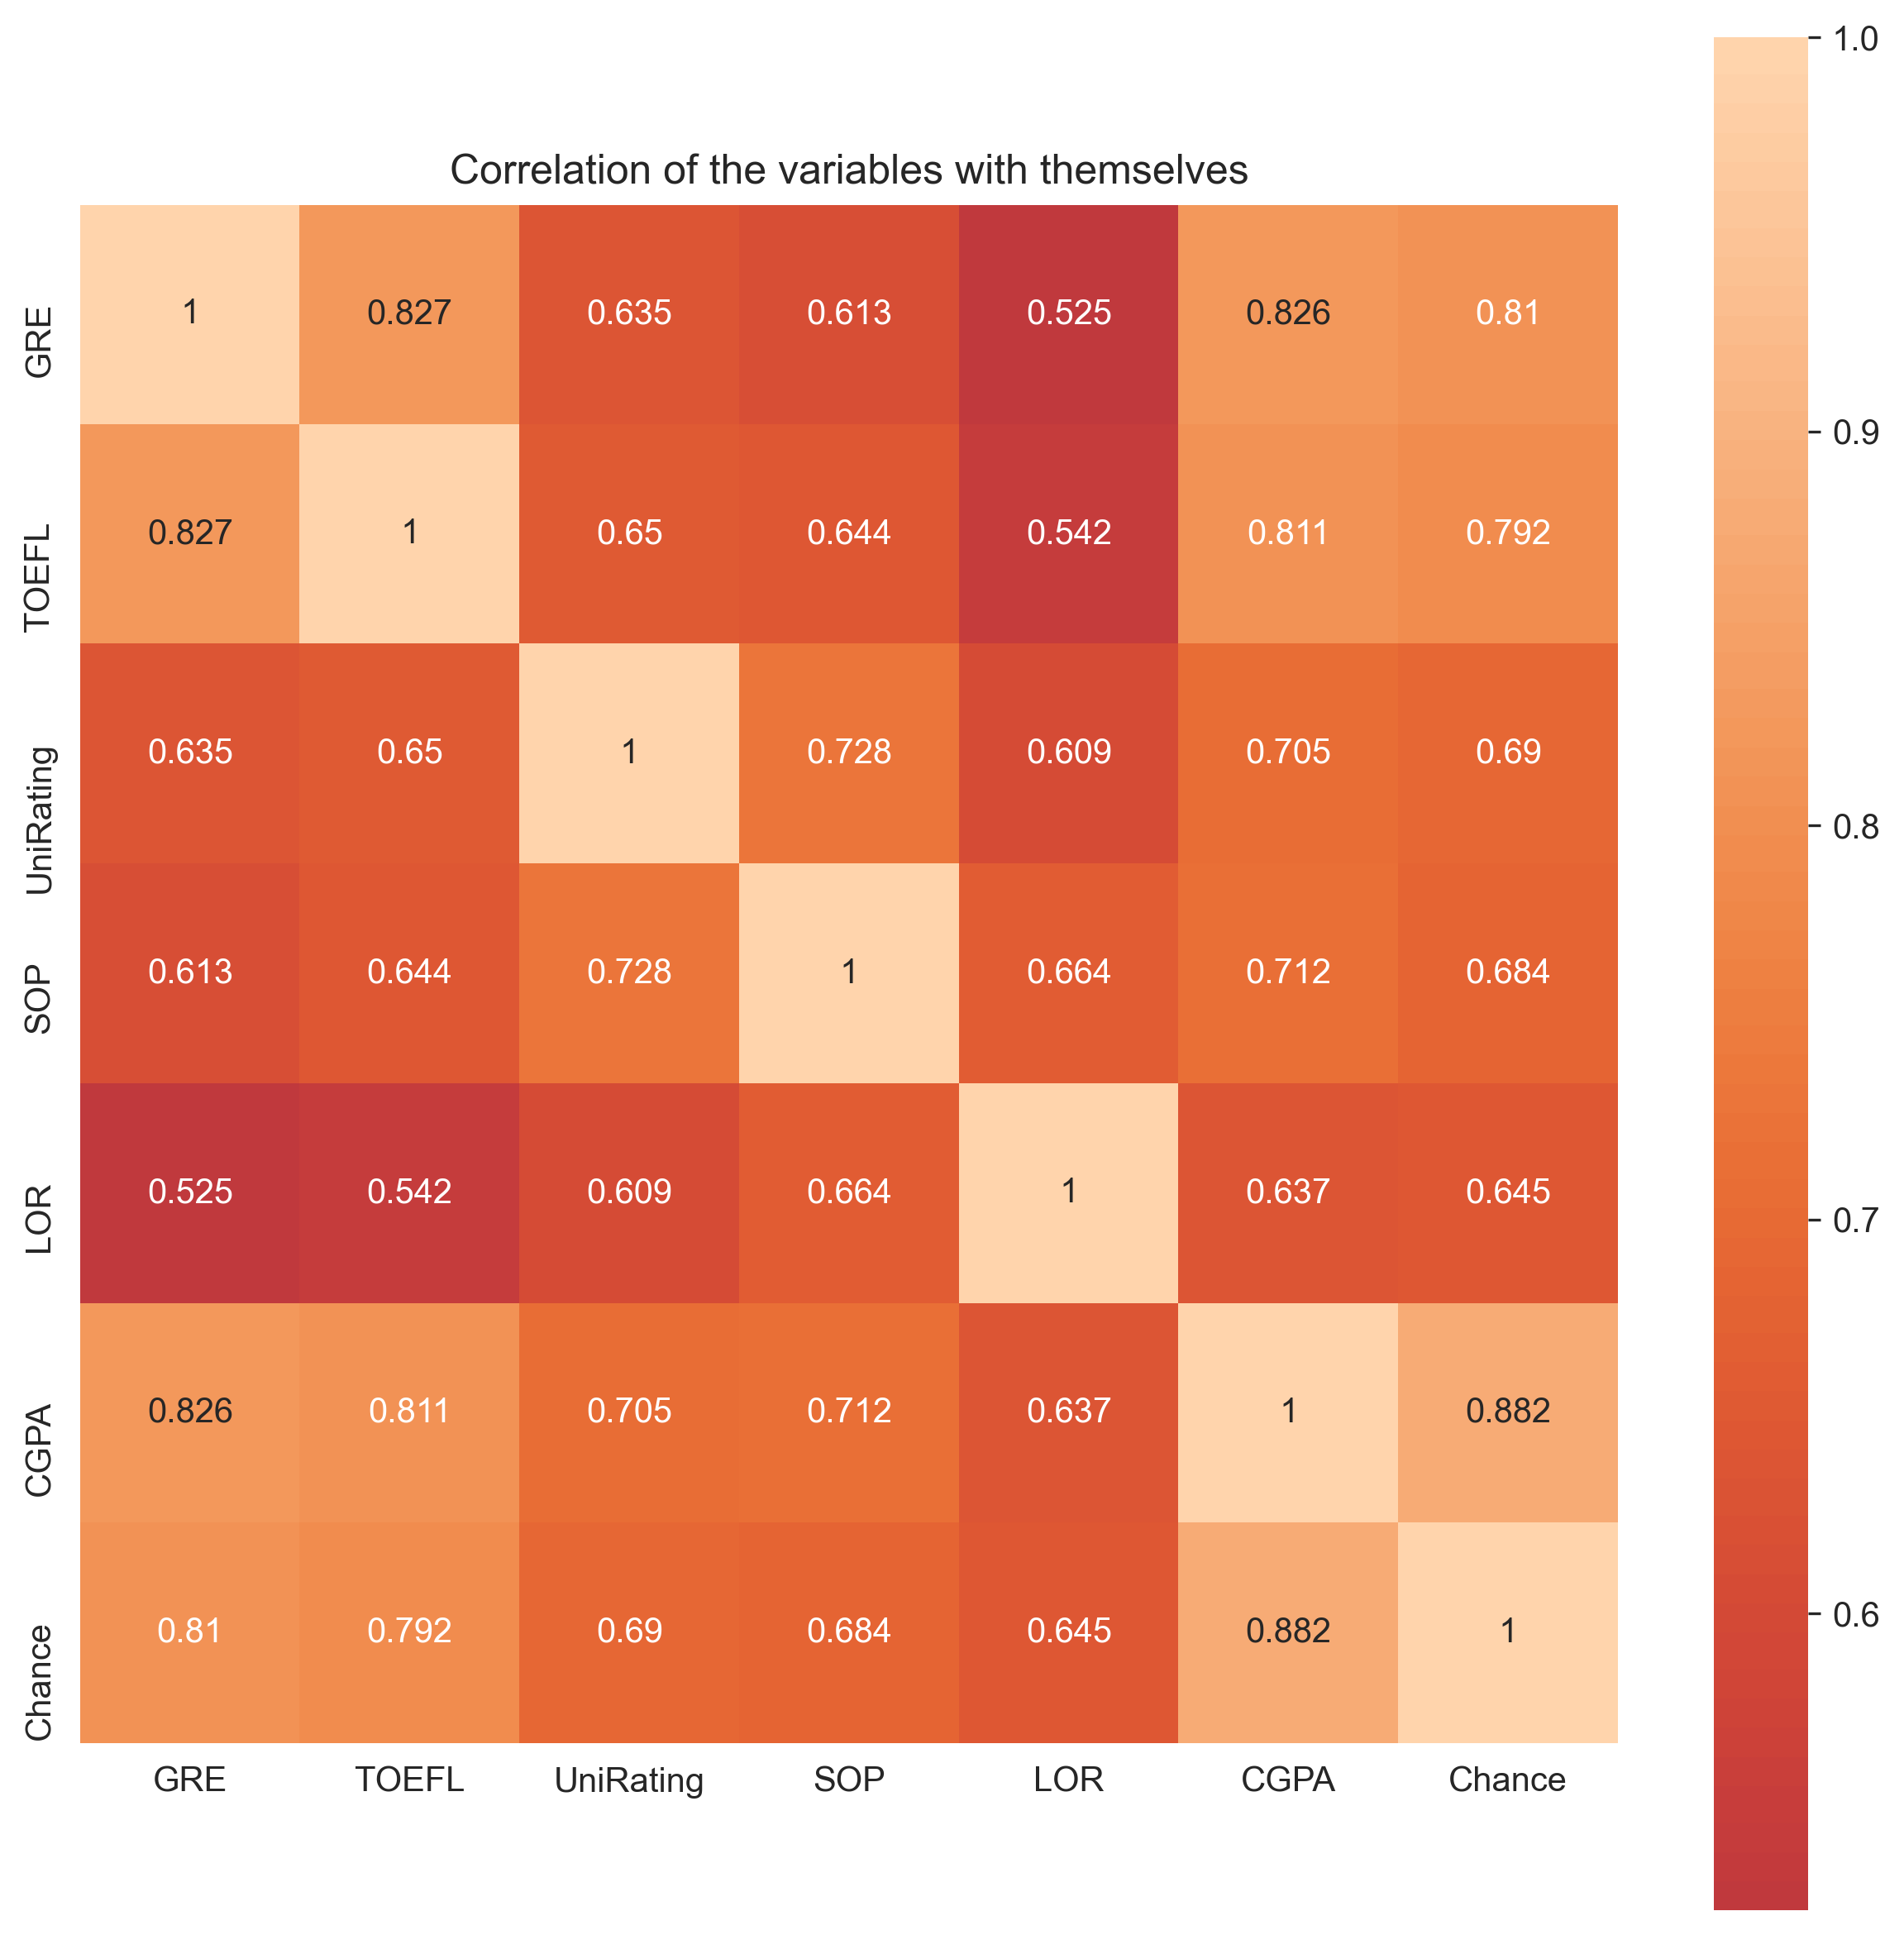

In [124]:
f, ax = plt.subplots(figsize=(10,10), dpi = 300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(x.corr(), annot=True, fmt='.3g', center=0, linewidths=0, cbar=True, square=True)
plt.title("Correlation of the variables with themselves")

# Now we implement ML algorithms

In [125]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data.drop(['Chance'], axis=1)
y = data.Chance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Linear Regression

Linear Regression mean squared error :  0.04293220746251859
Linear Regression R^2 score :  0.898286909853386


Text(0.5, 1.0, 'Linear Regression')

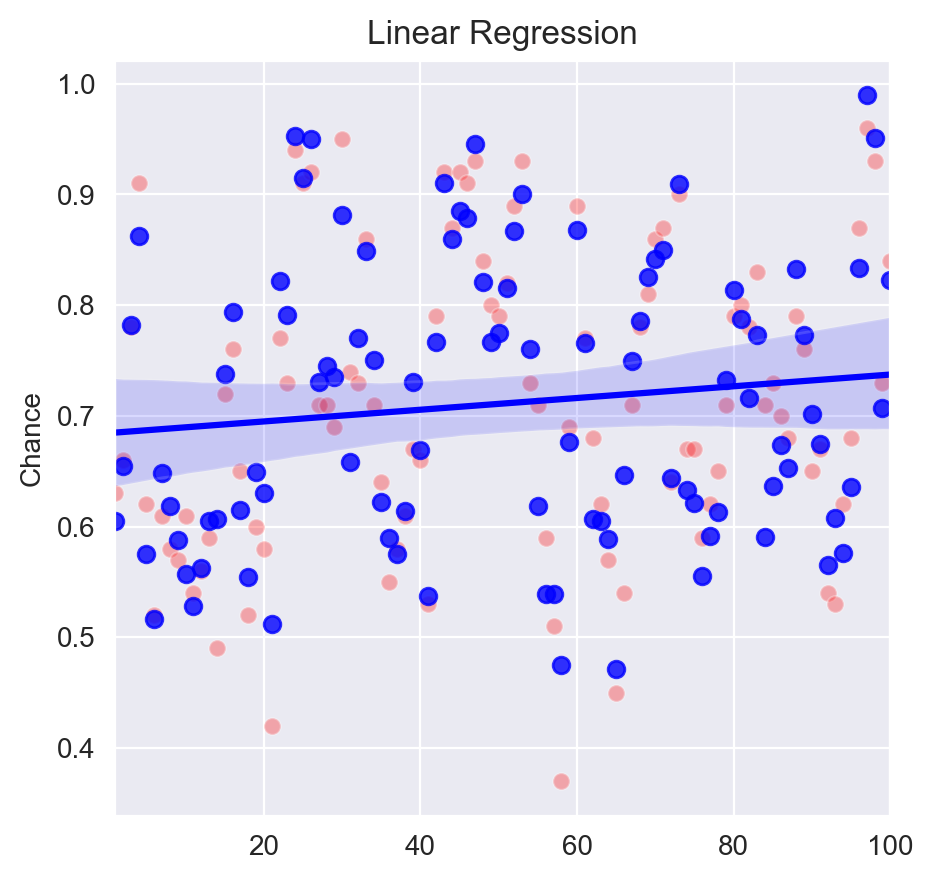

In [126]:
#lets do linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Linear Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Linear Regression R^2 score : ", model.score(X_test, y_test))

x = np.arange(1,101)
f, ax = plt.subplots(figsize=(5,5), dpi=200)
sns.scatterplot(x=x, y=y_test, color='r', alpha=0.3)
sns.regplot(x=x, y=prediction, color='b')
plt.title("Linear Regression")

In the above graph, the blue line is regression line plotted by regplot() of seaborn. The red dots are true values while blue ones are predicted!

Ridge Regression

In [127]:
#now we take a look at Ridge Regression
from sklearn.linear_model import Ridge

maxa = 0
maxs = 0
mina = 0
mins = 1


l = np.arange(0,10,0.01)
scorel = []
for i in l:
    model = Ridge(alpha=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scorel.append(score)
    if score > maxs:
        maxs = score
        maxa = i
    if score < mins:
        mins = score
        mina = i

model = Ridge(alpha=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Alpha of the Ridge : ", model.alpha)
print("Ridge Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Ridge Regression R^2 score : ", model.score(X_test, y_test))
predAlpha1 = prediction
print("-"*70)

model = Ridge(alpha=mina)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Alpha of the Ridge (worst alpha) : ", model.alpha)
print("Ridge Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Ridge Regression R^2 score : ", model.score(X_test, y_test))
predAlphaWorst = prediction
print("-"*70)

model = Ridge(alpha=maxa)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Alpha of the Ridge (best alpha) : ", model.alpha)
print("Ridge Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Ridge Regression R^2 score : ", model.score(X_test, y_test))
predAlphaBest = prediction

Alpha of the Ridge :  1
Ridge Regression mean squared error :  0.04289400118357367
Ridge Regression R^2 score :  0.8984678625586991
----------------------------------------------------------------------
Alpha of the Ridge (worst alpha) :  9.99
Ridge Regression mean squared error :  0.04364907261482329
Ridge Regression R^2 score :  0.8948618206887848
----------------------------------------------------------------------
Alpha of the Ridge (best alpha) :  1.45
Ridge Regression mean squared error :  0.04289021228127056
Ridge Regression R^2 score :  0.8984857987897976


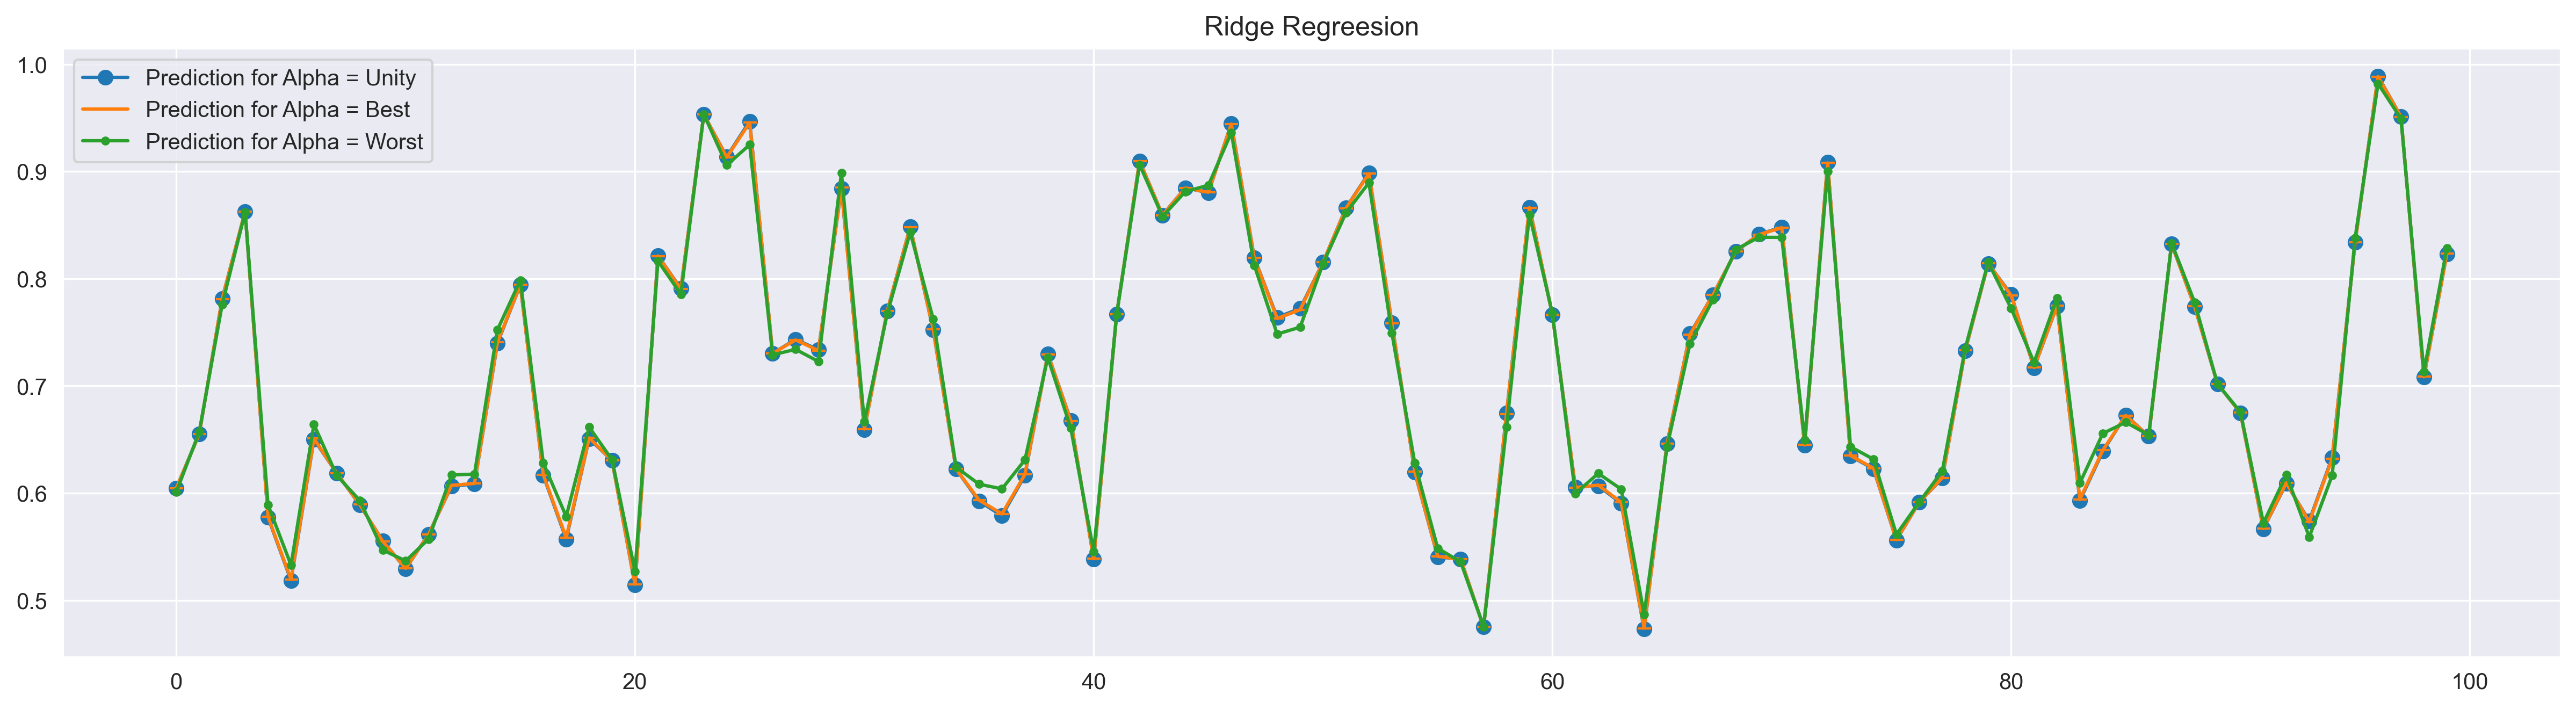

In [128]:
f, ax = plt.subplots(figsize=(20,5), dpi = 300)
plt.plot(predAlpha1, label='Prediction for Alpha = Unity', marker='o')
plt.plot(predAlphaBest, label='Prediction for Alpha = Best', marker='_' )
plt.plot(predAlphaWorst, label='Prediction for Alpha = Worst', marker='.')
plt.legend()
plt.title("Ridge Regreesion")
plt.show()

Text(0.5, 1.0, 'Alpha vs R^2 score for Ridge Regression')

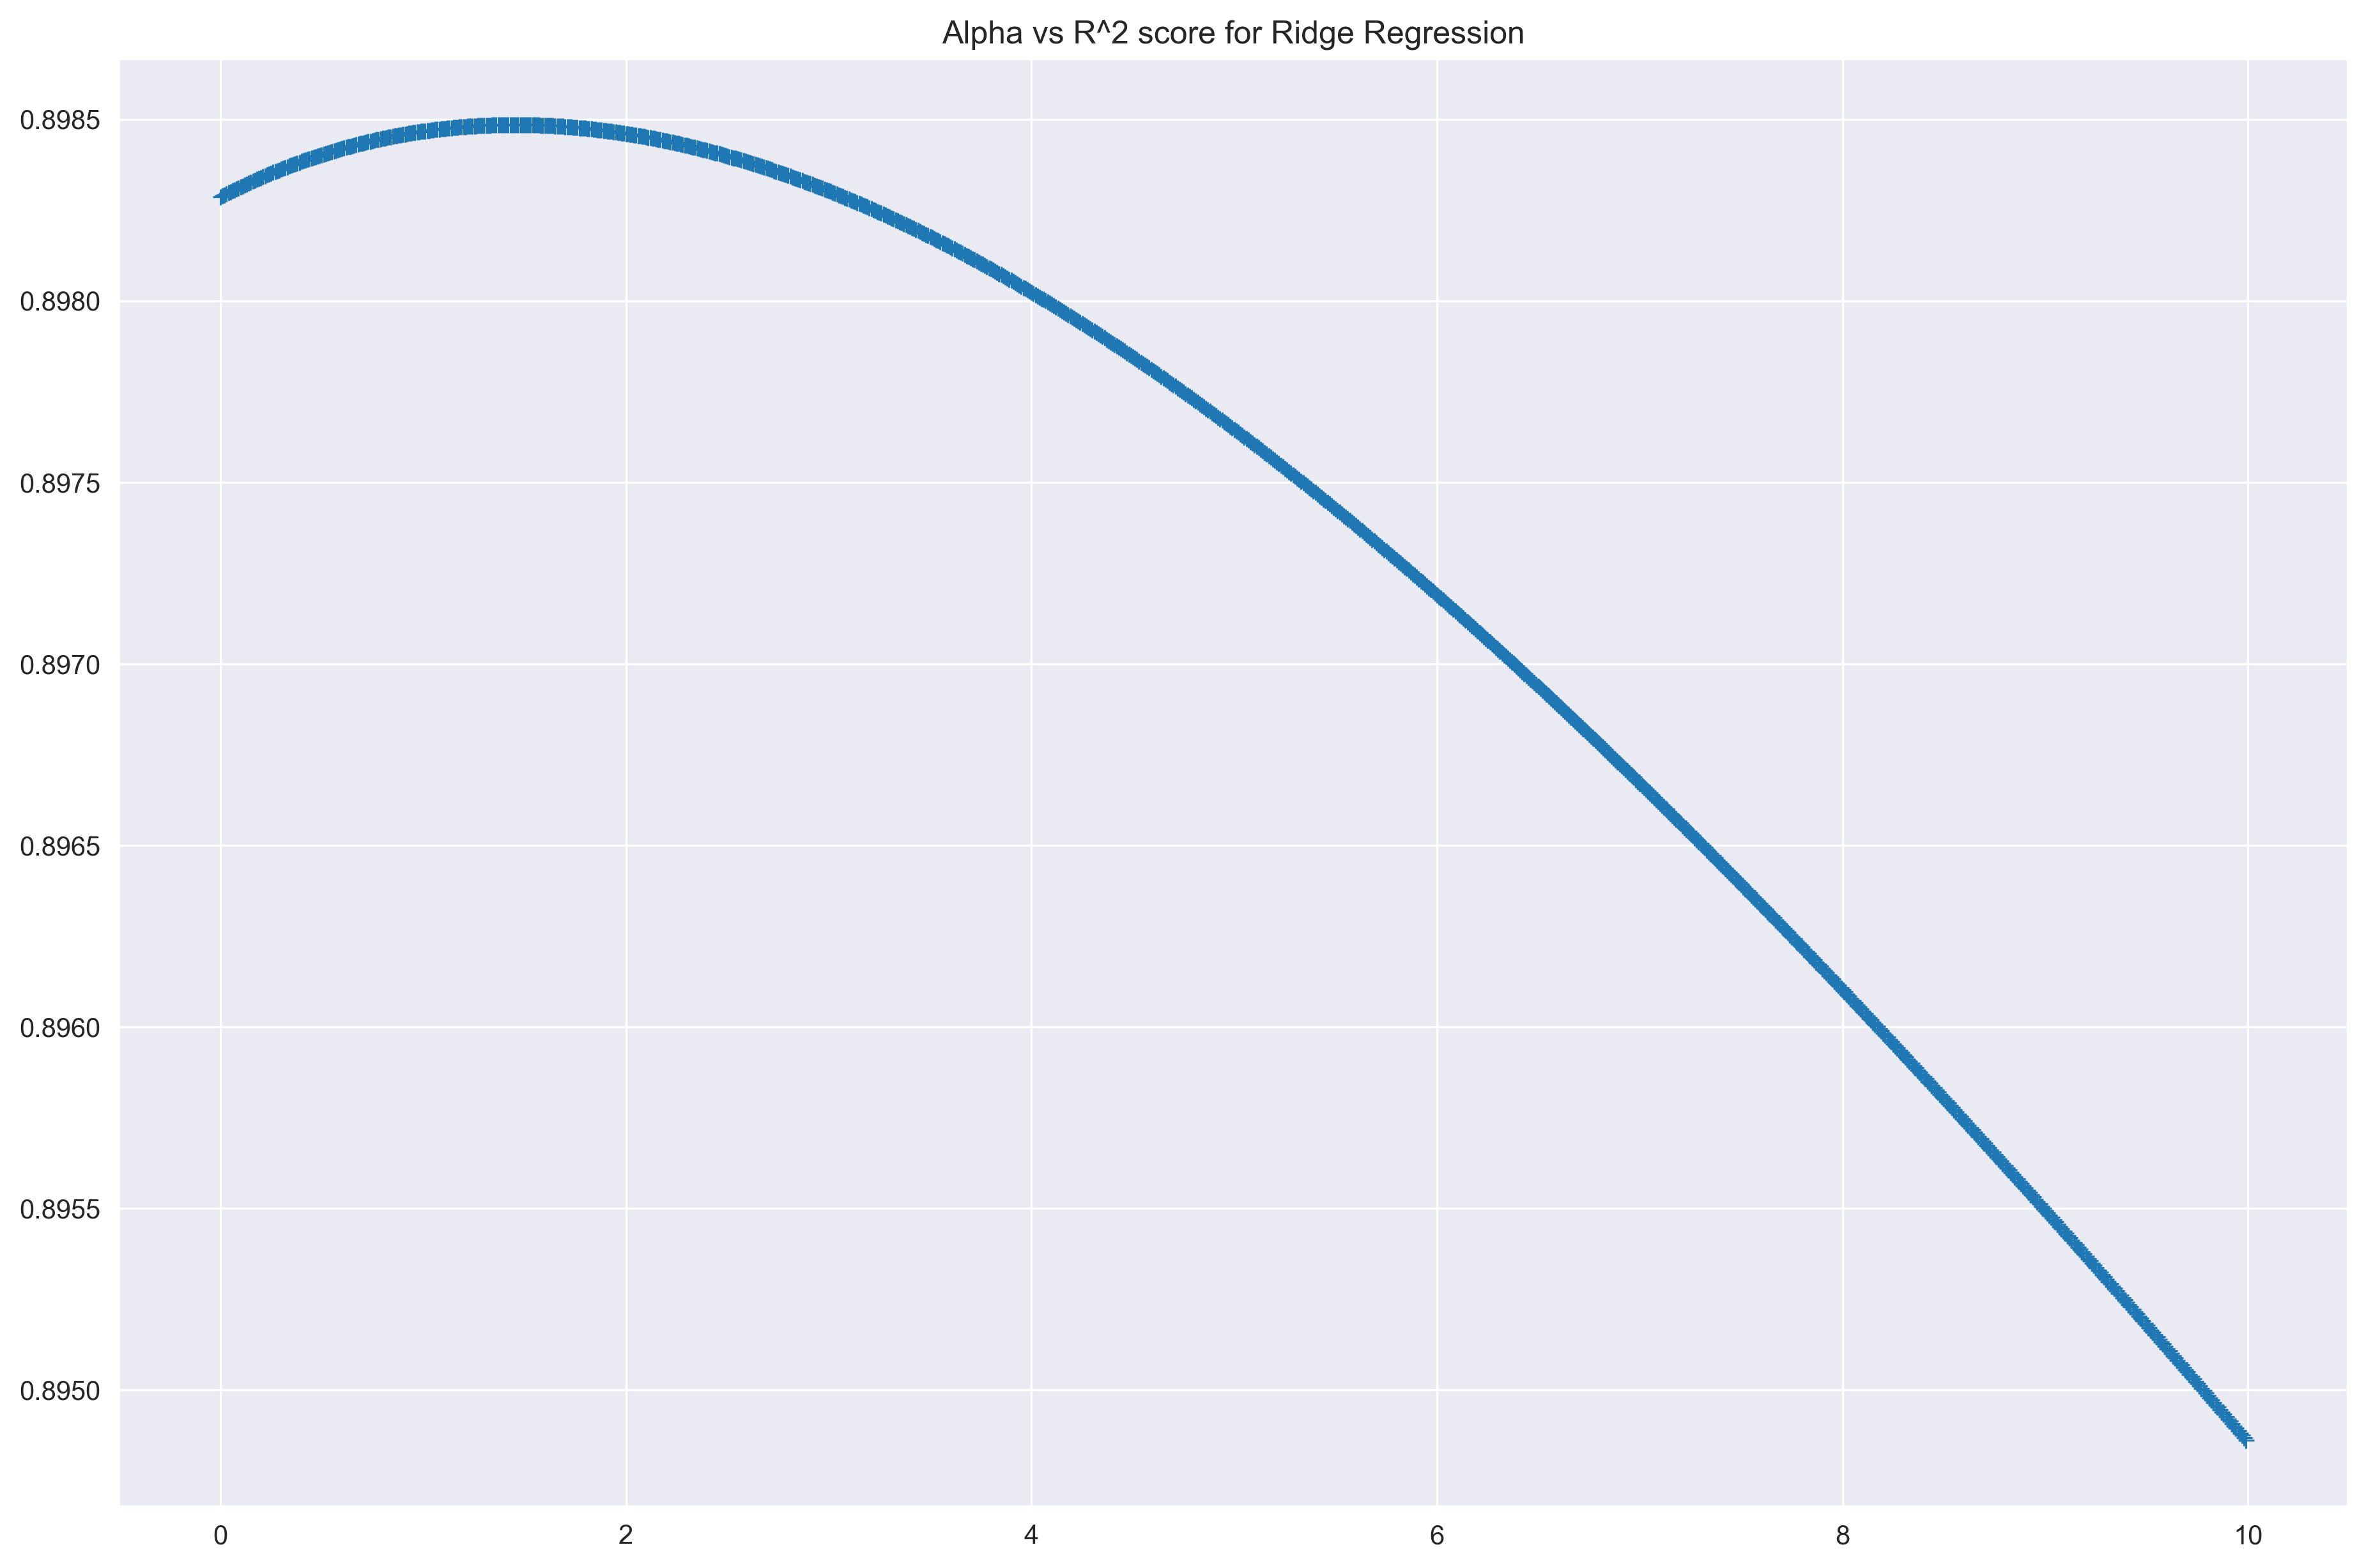

In [129]:
f, ax = plt.subplots(figsize=(15,10), dpi=300)
sns.scatterplot(x=l, y=scorel, marker='+')
plt.title("Alpha vs R^2 score for Ridge Regression")

Text(0.5, 1.0, 'Ridge Regression')

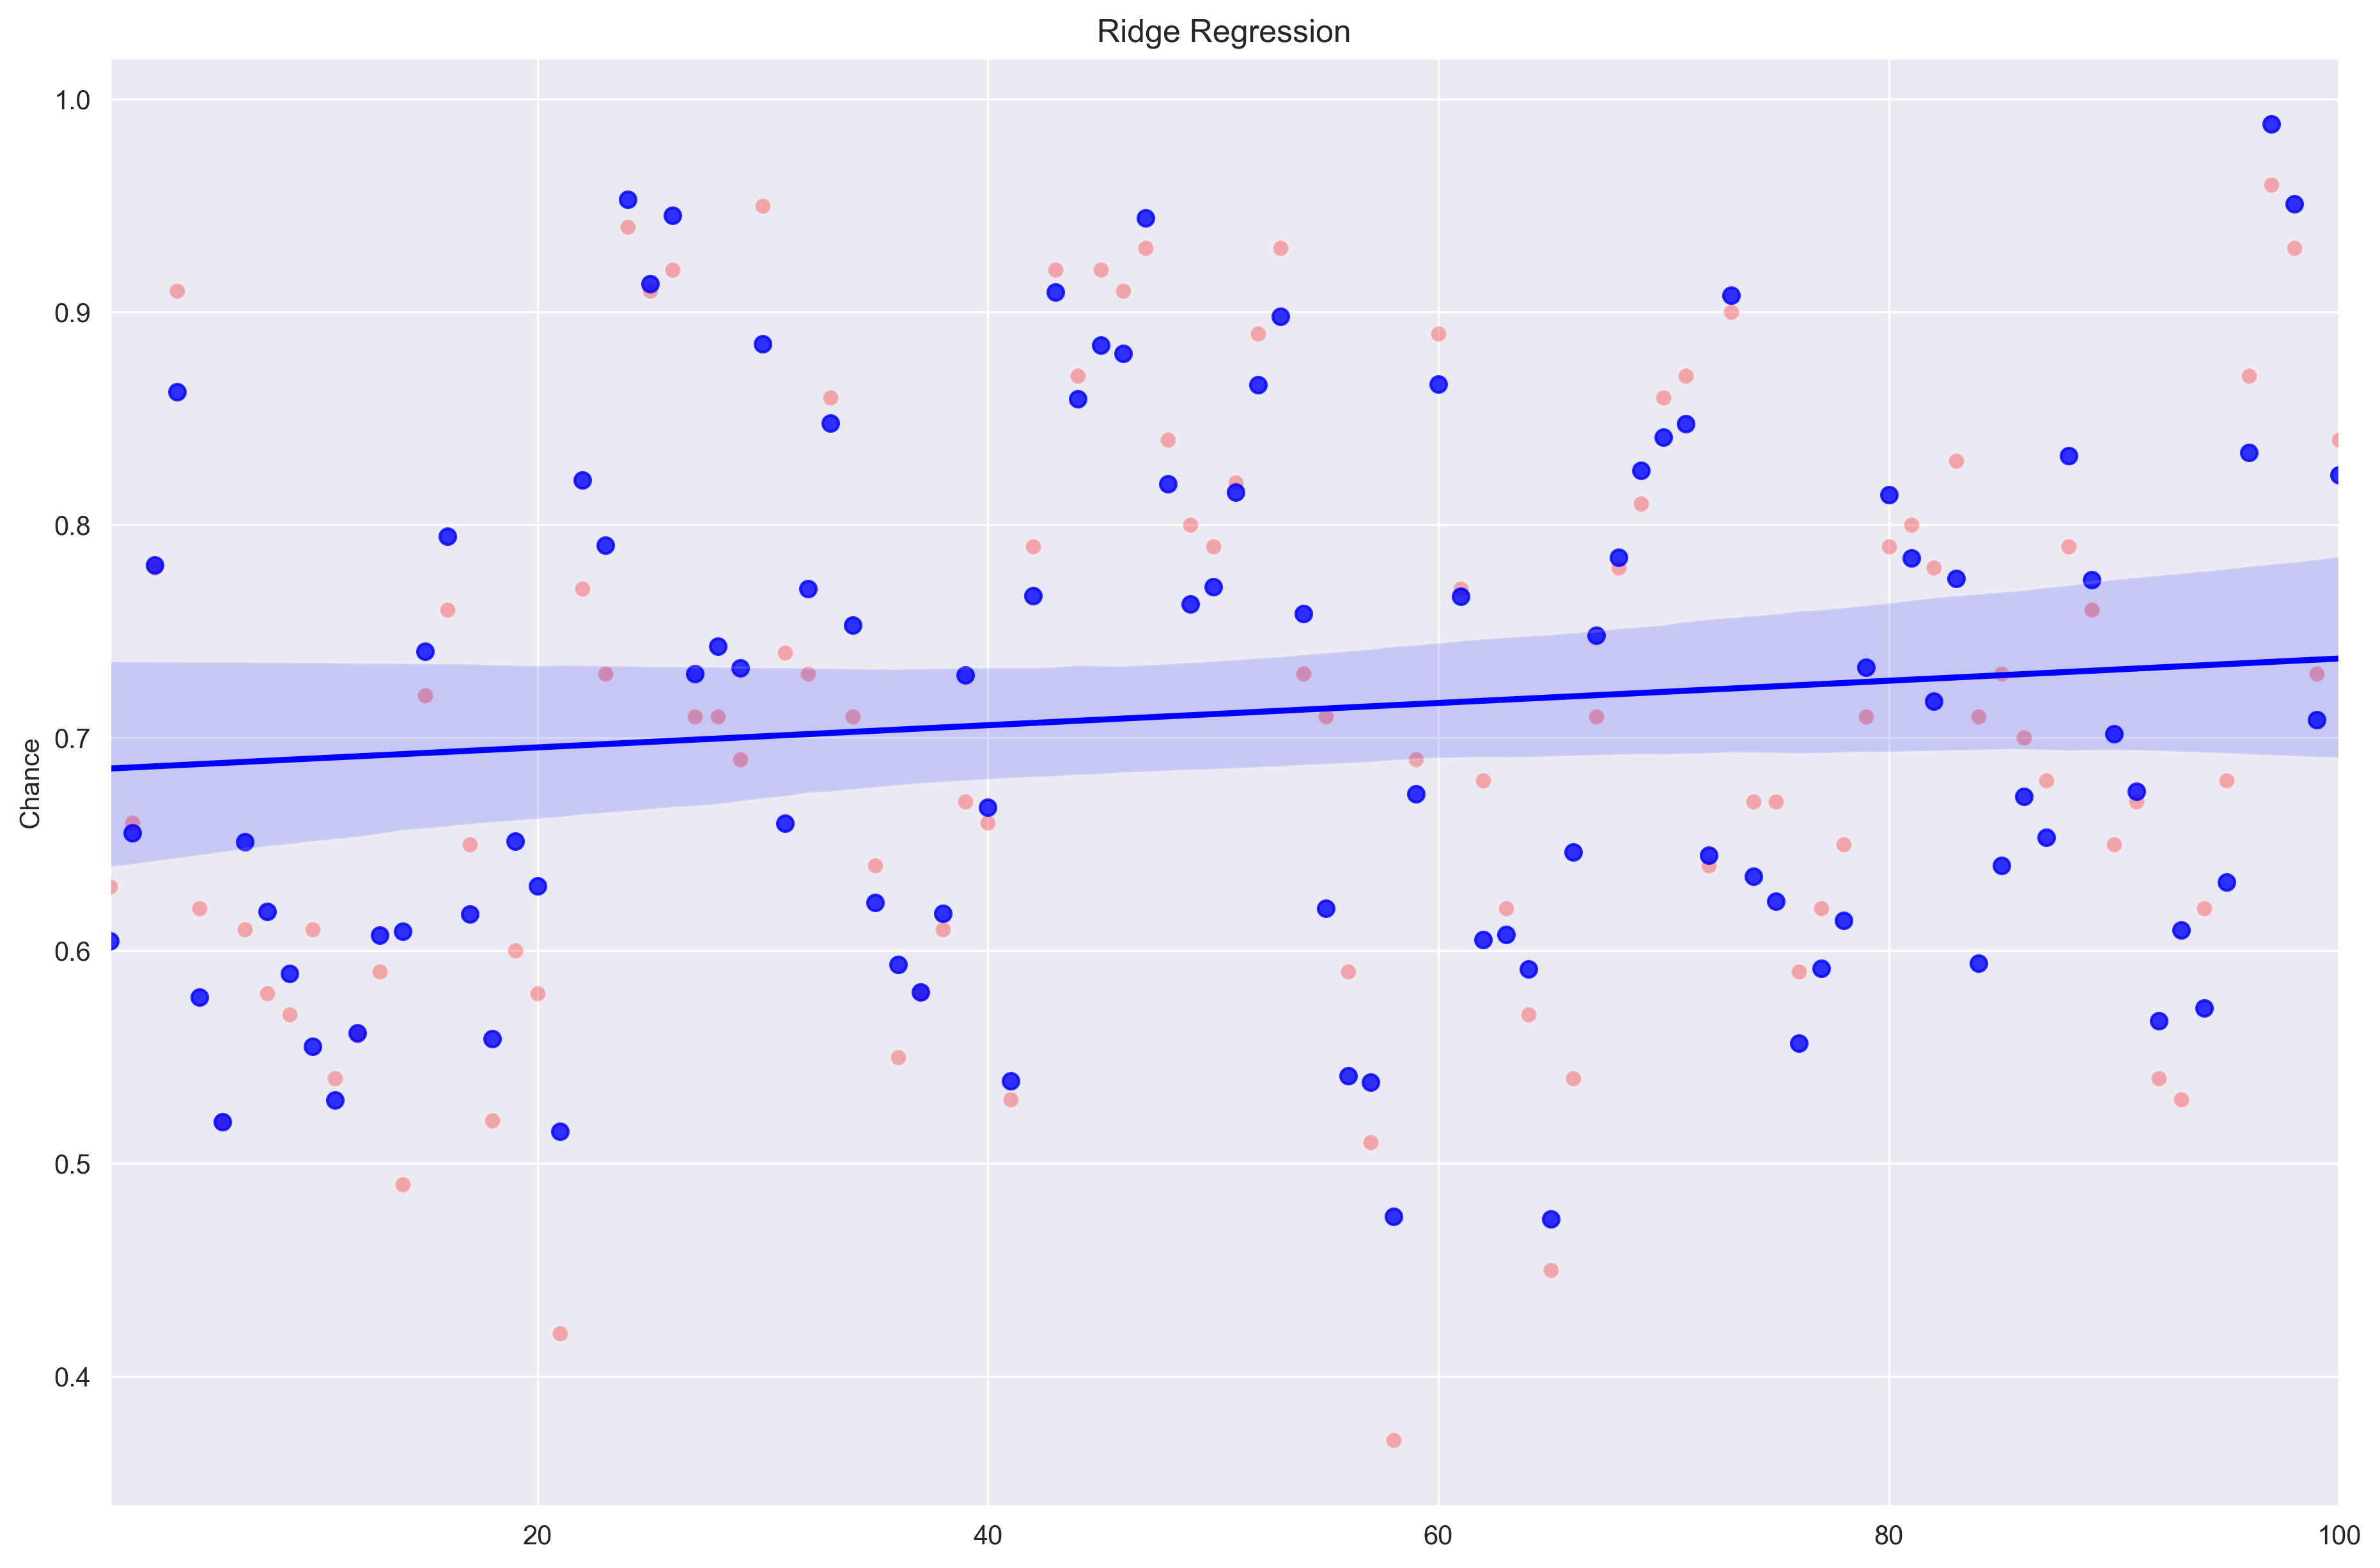

In [130]:
f, ax = plt.subplots(figsize=(15,10), dpi=300)
sns.scatterplot(x=x, y=y_test, color='r', alpha=0.3)
sns.regplot(x=x, y=prediction, color='b')
plt.title("Ridge Regression")

In the above graph, the blue line is regression line plotted by regplot() of seaborn. The red dots are true values while blue ones are predicted!

Lasso Regression

In [131]:
#now we do lasso regression
from sklearn.linear_model import Lasso
x = data

maxa = 0
maxs = 0
mina = 0
mins = 1


l = np.arange(0.1,10,0.01)
scorel = []
for i in l:
    model = Lasso(alpha=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scorel.append(score)
    if score > maxs:
        maxs = score
        maxa = i
    if score < mins:
        mins = score
        mina = i

model = Lasso(alpha=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Coefficients of the Lasso model : ", model.coef_)
print("Lasso Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Lasso Regression R^2 score : ", model.score(X_test, y_test))
predAlpha1 = prediction
print("-"*70)

model = Lasso(alpha=mina)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Coefficients of the Lasso model (worst score) : ", model.coef_)
print("Lasso Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Lasso Regression R^2 score : ", model.score(X_test, y_test))
predAlphaWorst = prediction
print("-"*70)

model = Lasso(alpha=maxa)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Coefficients of the Lasso model (best score) : ", model.coef_)
print("Lasso Regression mean squared error : ", np.sqrt(mean_squared_error(y_test, prediction)))
print("Lasso Regression R^2 score : ", model.score(X_test, y_test))
predAlphaBest = prediction


Coefficients of the Lasso model :  [0.00236063 0.         0.         0.         0.         0.
 0.        ]
Lasso Regression mean squared error :  0.11488570174881235
Lasso Regression R^2 score :  0.2716462294217653
----------------------------------------------------------------------
Coefficients of the Lasso model (worst score) :  [0. 0. 0. 0. 0. 0. 0.]
Lasso Regression mean squared error :  0.13524648793961344
Lasso Regression R^2 score :  -0.009397913285519088
----------------------------------------------------------------------
Coefficients of the Lasso model (best score) :  [0.00728218 0.00436988 0.         0.         0.         0.
 0.        ]
Lasso Regression mean squared error :  0.06936637441981691
Lasso Regression R^2 score :  0.7344731754961297


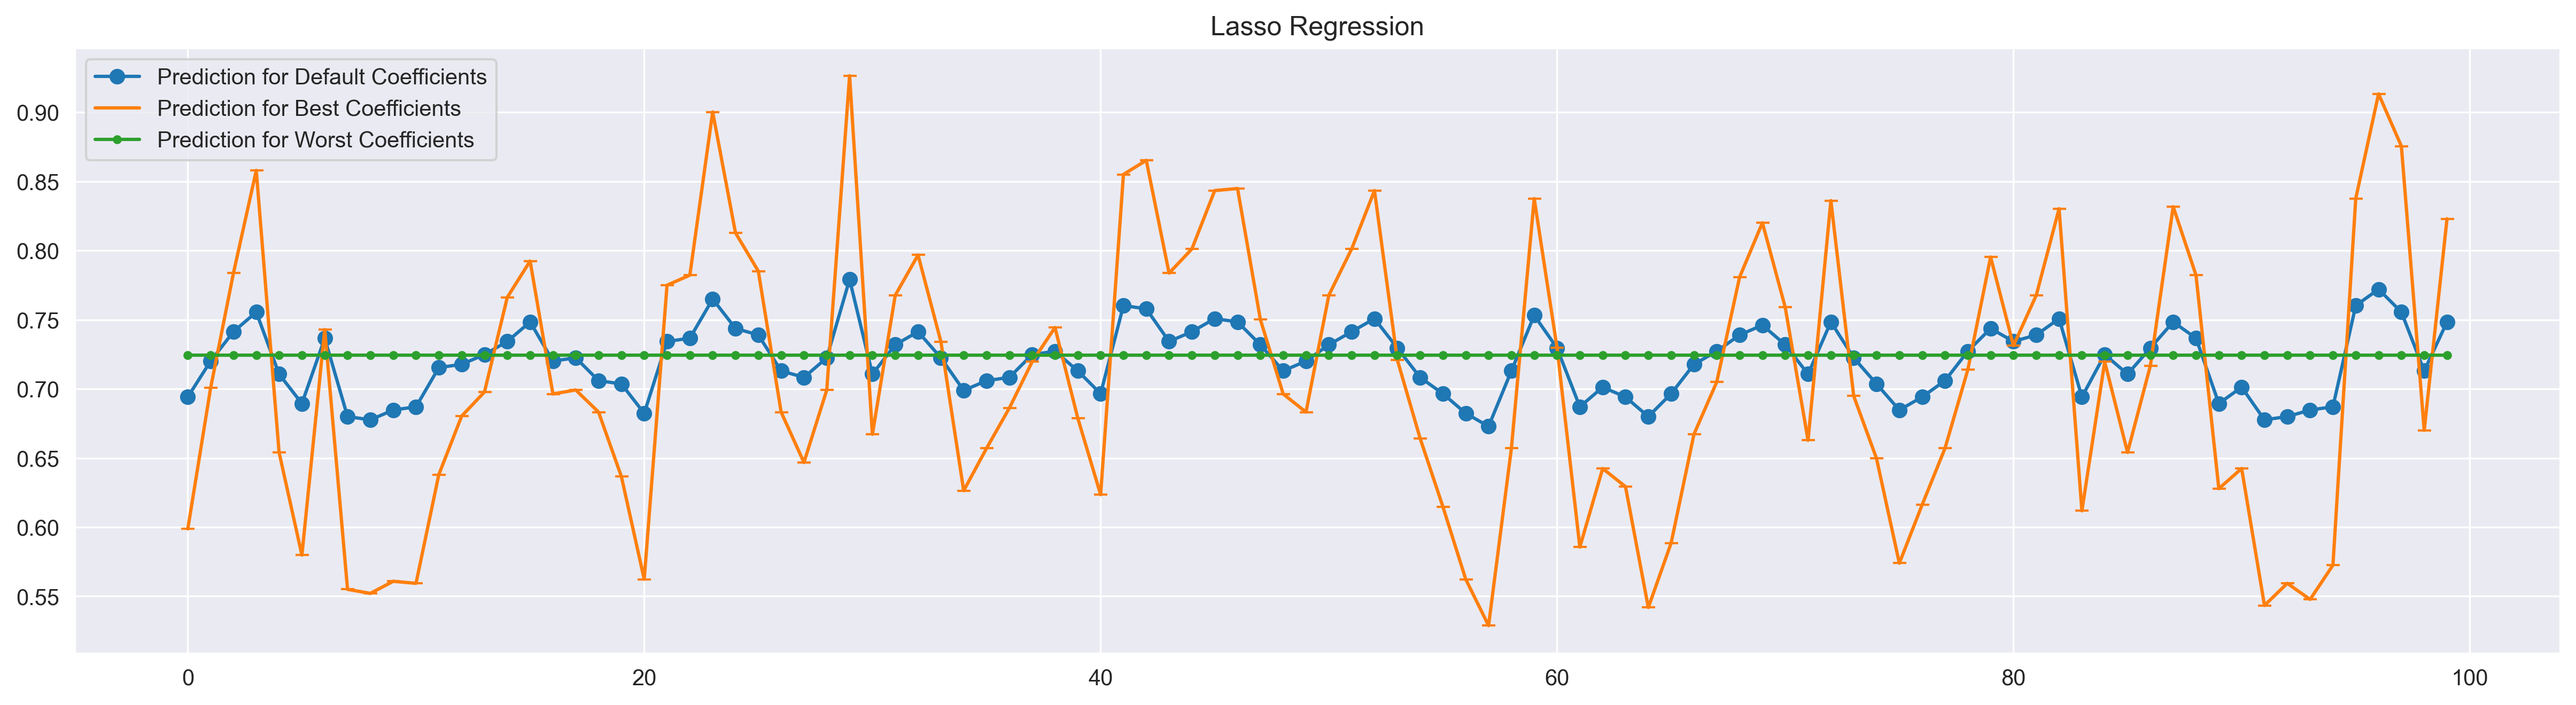

In [132]:
f, ax = plt.subplots(figsize=(20,5), dpi = 300)
plt.plot(predAlpha1, label='Prediction for Default Coefficients', marker='o')
plt.plot(predAlphaBest, label='Prediction for Best Coefficients', marker='_' )
plt.plot(predAlphaWorst, label='Prediction for Worst Coefficients', marker='.')
plt.legend()
plt.title("Lasso Regression")
plt.show()

Text(0.5, 1.0, 'Alpha vs R^2 score for Lasso Regression')

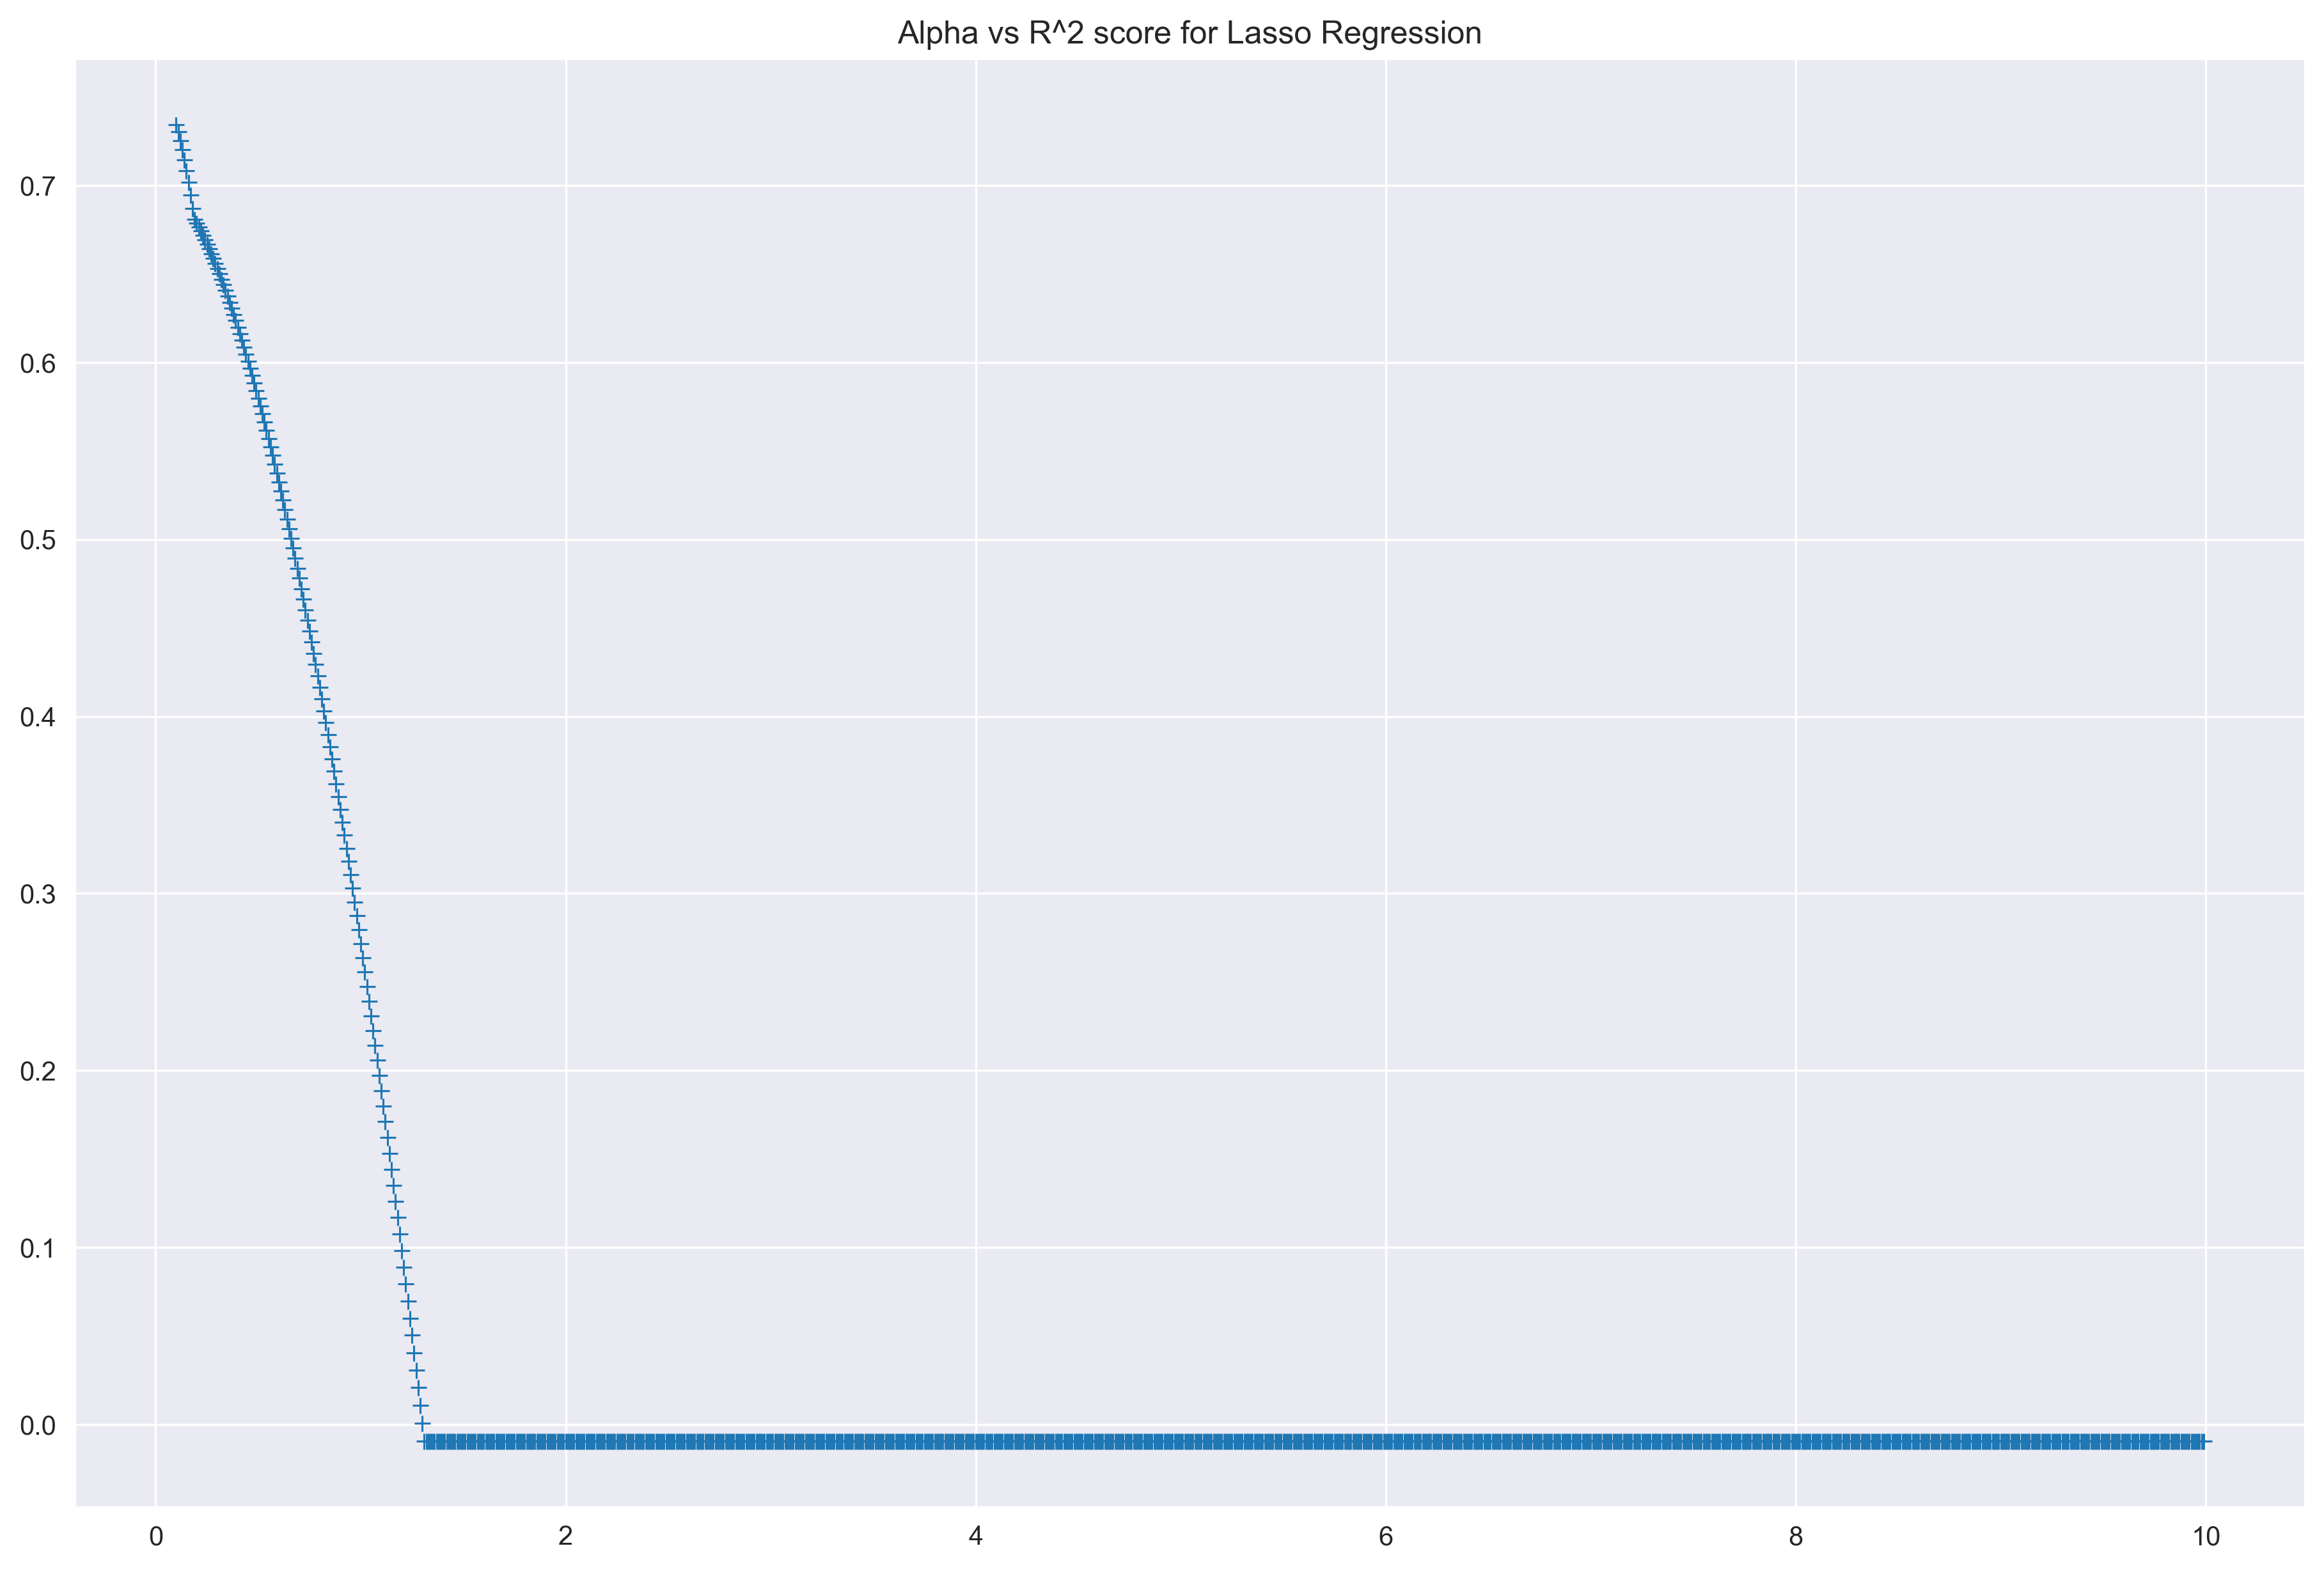

In [133]:
f, ax = plt.subplots(figsize=(15,10), dpi=300)
sns.scatterplot(x=l, y=scorel, marker='+')
plt.title("Alpha vs R^2 score for Lasso Regression")

In [134]:
data.describe()

GRE       TOEFL   UniRating         SOP        LOR        CGPA  \
count  500.000000  500.000000  500.000000  500.000000  500.00000  500.000000   
mean   316.472000  107.192000    3.114000    3.374000    3.48400    8.576440   
std     11.295148    6.081868    1.143512    0.991004    0.92545    0.604813   
min    290.000000   92.000000    1.000000    1.000000    1.00000    6.800000   
25%    308.000000  103.000000    2.000000    2.500000    3.00000    8.127500   
50%    317.000000  107.000000    3.000000    3.500000    3.50000    8.560000   
75%    325.000000  112.000000    4.000000    4.000000    4.00000    9.040000   
max    340.000000  120.000000    5.000000    5.000000    5.00000    9.920000   

          Chance  
count  500.00000  
mean     0.72174  
std      0.14114  
min      0.34000  
25%      0.63000  
50%      0.72000  
75%      0.82000  
max      0.97000

Let's perform cross validation on splitting for Linear Regression method. 

In [135]:
#Now we do cross validation for linear regression 
from sklearn.model_selection import cross_val_score

model = LinearRegression()
X = data.loc[:,:'CGPA']
y = data['Chance']
k = 5

cv_res = cross_val_score(model, X, y, cv=k)
print("Cross-validation scores : ", cv_res)
print("Cross-validation score average : ", np.sum(cv_res)/k)

Cross-validation scores :  [0.67389521 0.79125992 0.87590568 0.81033799 0.89365581]
Cross-validation score average :  0.8090109217125606


In [136]:
#now we make a column in the dataframe that has categorical data
#the categorical data will be chance of getting an admit

In [137]:
data.describe()

GRE       TOEFL   UniRating         SOP        LOR        CGPA  \
count  500.000000  500.000000  500.000000  500.000000  500.00000  500.000000   
mean   316.472000  107.192000    3.114000    3.374000    3.48400    8.576440   
std     11.295148    6.081868    1.143512    0.991004    0.92545    0.604813   
min    290.000000   92.000000    1.000000    1.000000    1.00000    6.800000   
25%    308.000000  103.000000    2.000000    2.500000    3.00000    8.127500   
50%    317.000000  107.000000    3.000000    3.500000    3.50000    8.560000   
75%    325.000000  112.000000    4.000000    4.000000    4.00000    9.040000   
max    340.000000  120.000000    5.000000    5.000000    5.00000    9.920000   

          Chance  
count  500.00000  
mean     0.72174  
std      0.14114  
min      0.34000  
25%      0.63000  
50%      0.72000  
75%      0.82000  
max      0.97000

In [138]:
#list comprehension for the new column
data['ChanceCat'] = ['Very likely' if i > 0.82 else 'Likely' if i > 0.72 else 'Somewhat likely' if i > 0.63 else 'Not likely' for i in data['Chance']]

In [139]:
#checking if the changes took place
data[['Chance','ChanceCat']].head()

Chance        ChanceCat
Serial No.                         
1             0.92      Very likely
2             0.76           Likely
3             0.72  Somewhat likely
4             0.80           Likely
5             0.65  Somewhat likely

In [140]:
#changing the data type of the newly created column as categorical data
data['ChanceCat'] = data['ChanceCat'].astype('category')

Text(0.5, 1.0, 'Chance Distribution of getting admitted')

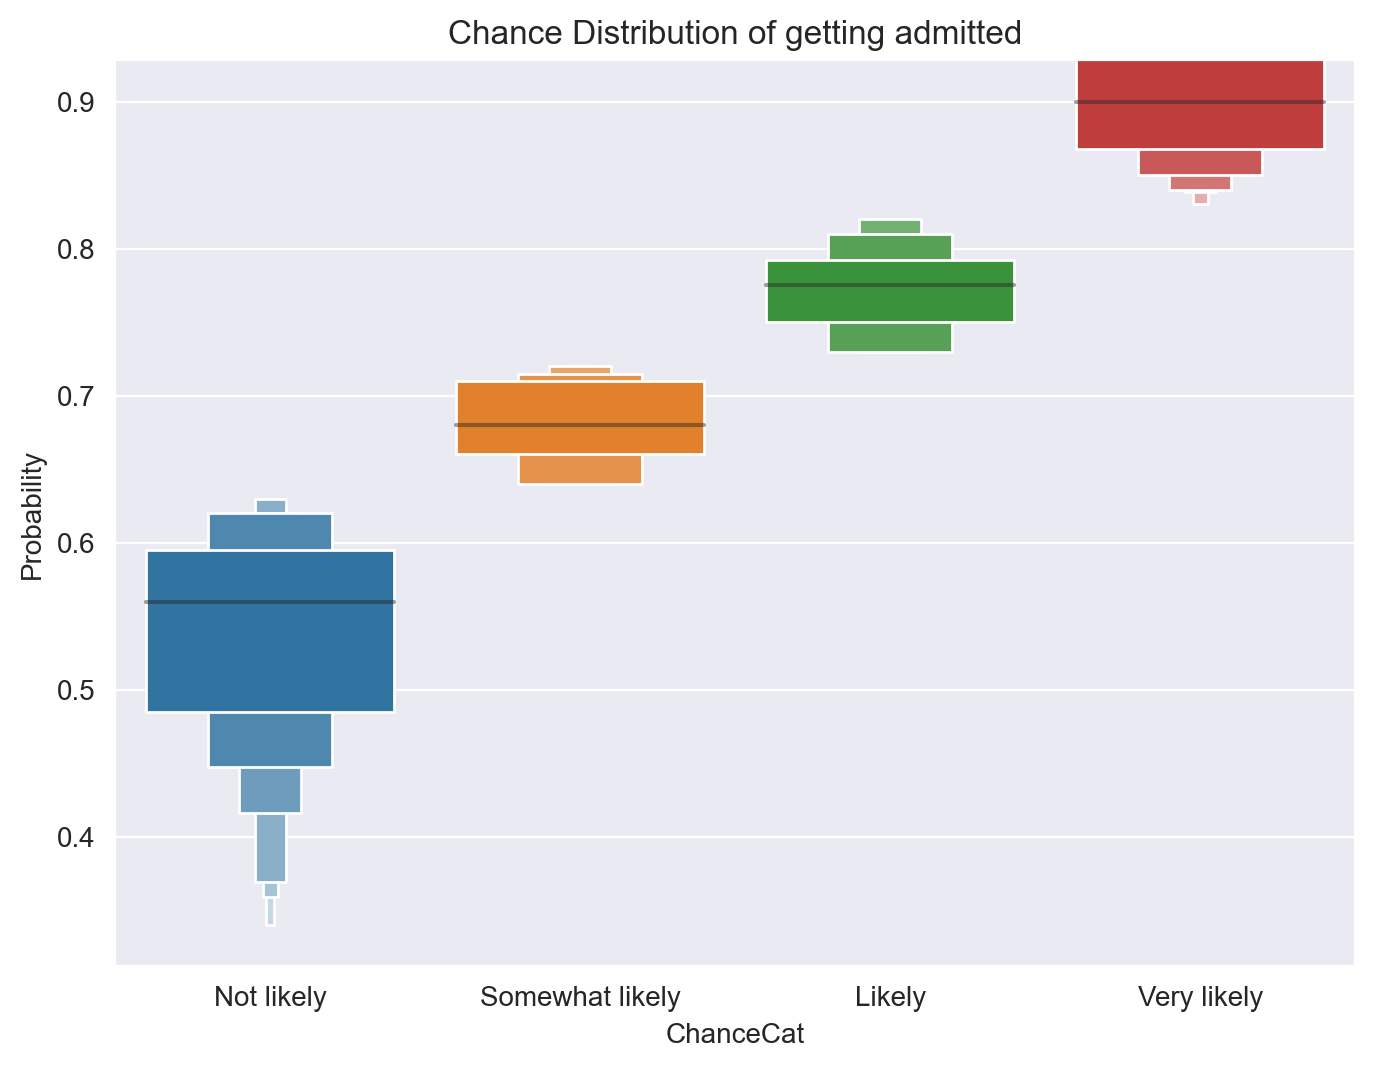

In [141]:
#plotting the ChanceCat
f, ax = plt.subplots(figsize=(8,6), dpi=200)
sns.boxenplot(x='ChanceCat', y='Chance', data=data, order=['Not likely', 'Somewhat likely', 'Likely', 'Very likely'])
plt.ylabel("Probability")
plt.title("Chance Distribution of getting admitted")

Logistic Regression

In [142]:
#Let's do logistic regression on the newly created categorical data
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

In [143]:
data['ChanceInt'] = [1 if i=='Likely' else 0 if i=='Not likely' else 0 if i=='Somewhat likely' else 1 for i in data['ChanceCat']]
data['ChanceInt'] = data['ChanceInt'].astype('category')
X = data.loc[:,'GRE':'Research']
X = np.array(X)
X = preprocessing.scale(X)
y = data['ChanceInt']

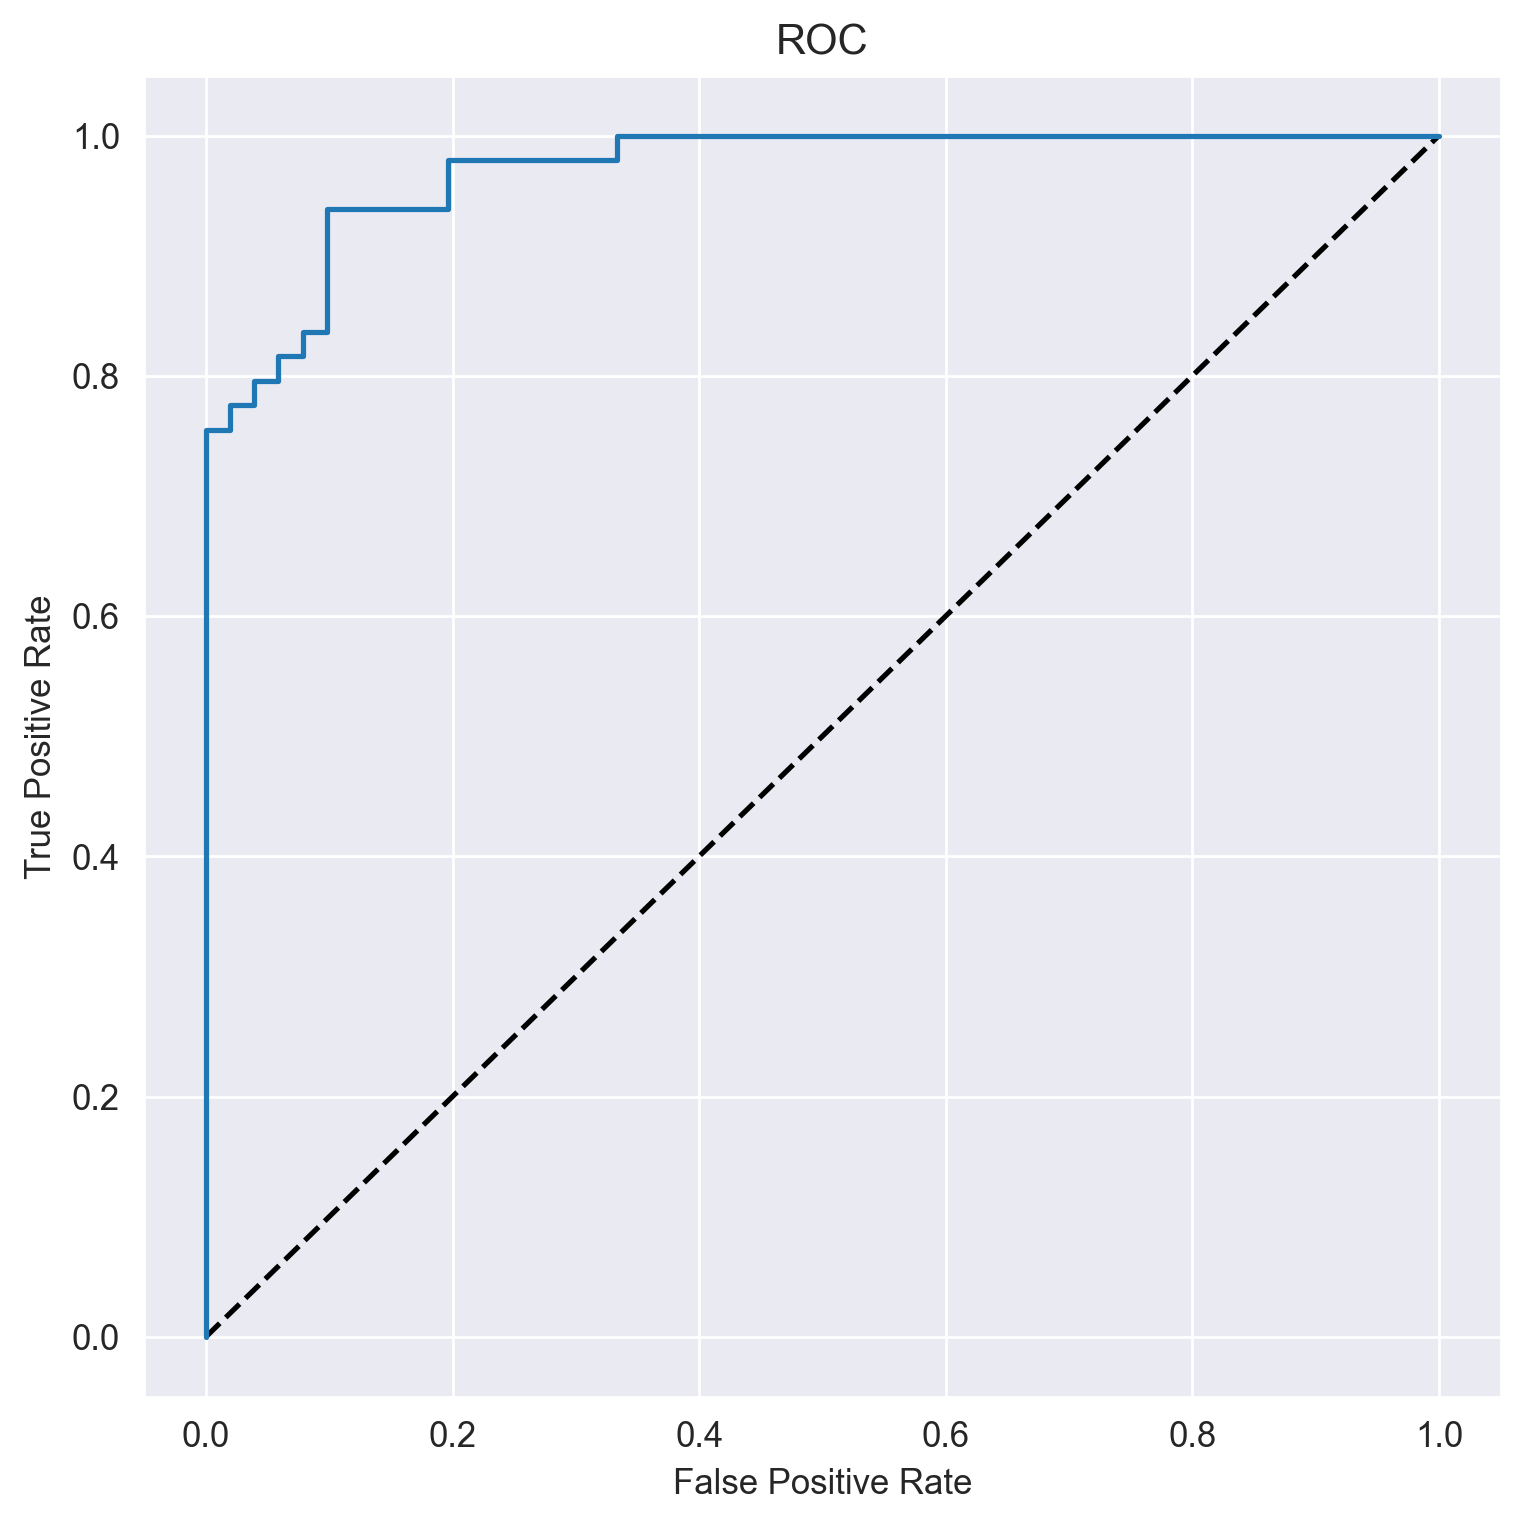

R^2 score :  0.91


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

f, ax = plt.subplots(figsize=(7,7), dpi=250)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print("R^2 score : ", model.score(X_test, y_test))

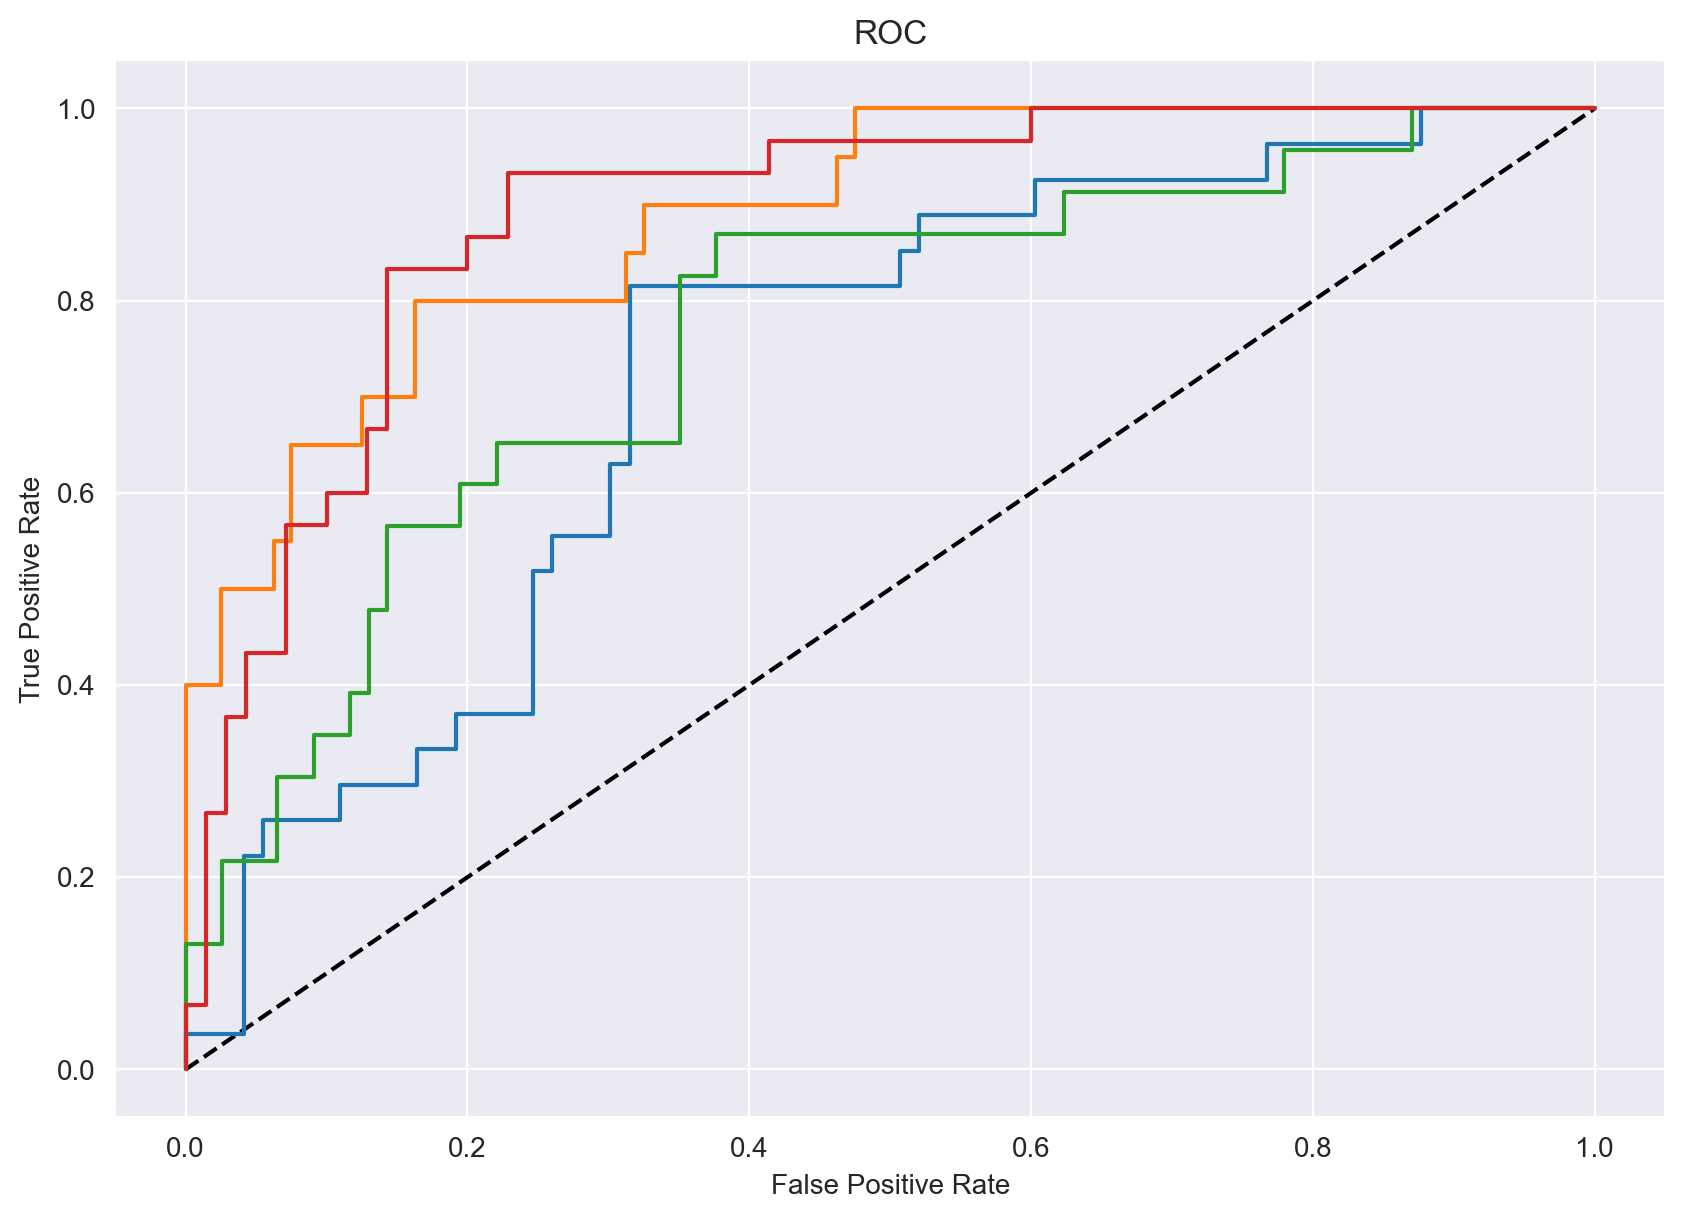

R^2 score :  0.55


In [145]:
X = data.loc[:,:'Chance']
y = data['ChanceCat']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prediction = model.predict_proba(X_test)
y_test_dummies = pd.get_dummies(y_test,drop_first=False).values

fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(4):
    fpr[i],tpr[i],thresholds[i] = roc_curve(y_test_dummies[:,i],y_prediction[:,i])

f, ax = plt.subplots(figsize=(10,7), dpi=200)    
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr[0],tpr[0])
plt.plot(fpr[1],tpr[1])
plt.plot(fpr[2],tpr[2])
plt.plot(fpr[3],tpr[3])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print("R^2 score : ", model.score(X_test, y_test))

K Nearest Neighbors using KNighborsClassifier

In [146]:
#Now let's take a look at KNN

In [147]:
data.columns
#the columns ChanceCat and ChanceInt are redundant values
#we should drop the column ChanceInt to save memory
data.drop('ChanceInt', axis=1)

GRE  TOEFL  UniRating  SOP  LOR  CGPA Research  Chance  \
Serial No.                                                           
1           337    118          4  4.5  4.5  9.65        1    0.92   
2           324    107          4  4.0  4.5  8.87        1    0.76   
3           316    104          3  3.0  3.5  8.00        1    0.72   
4           322    110          3  3.5  2.5  8.67        1    0.80   
5           314    103          2  2.0  3.0  8.21        0    0.65   
...         ...    ...        ...  ...  ...   ...      ...     ...   
496         332    108          5  4.5  4.0  9.02        1    0.87   
497         337    117          5  5.0  5.0  9.87        1    0.96   
498         330    120          5  4.5  5.0  9.56        1    0.93   
499         312    103          4  4.0  5.0  8.43        0    0.73   
500         327    113          4  4.5  4.5  9.04        0    0.84   

                  ChanceCat  
Serial No.                   
1               Very likely  
2                    Likely  
3           Somewhat likely  
4                    Likely  
5           Somewhat likely  
...                     ...  
496             Very likely  
497             Very likely  
498             Very likely  
499                  Likely  
500             Very likely  

[500 rows x 9 columns]

Best accuracy is 0.67 with k = 24


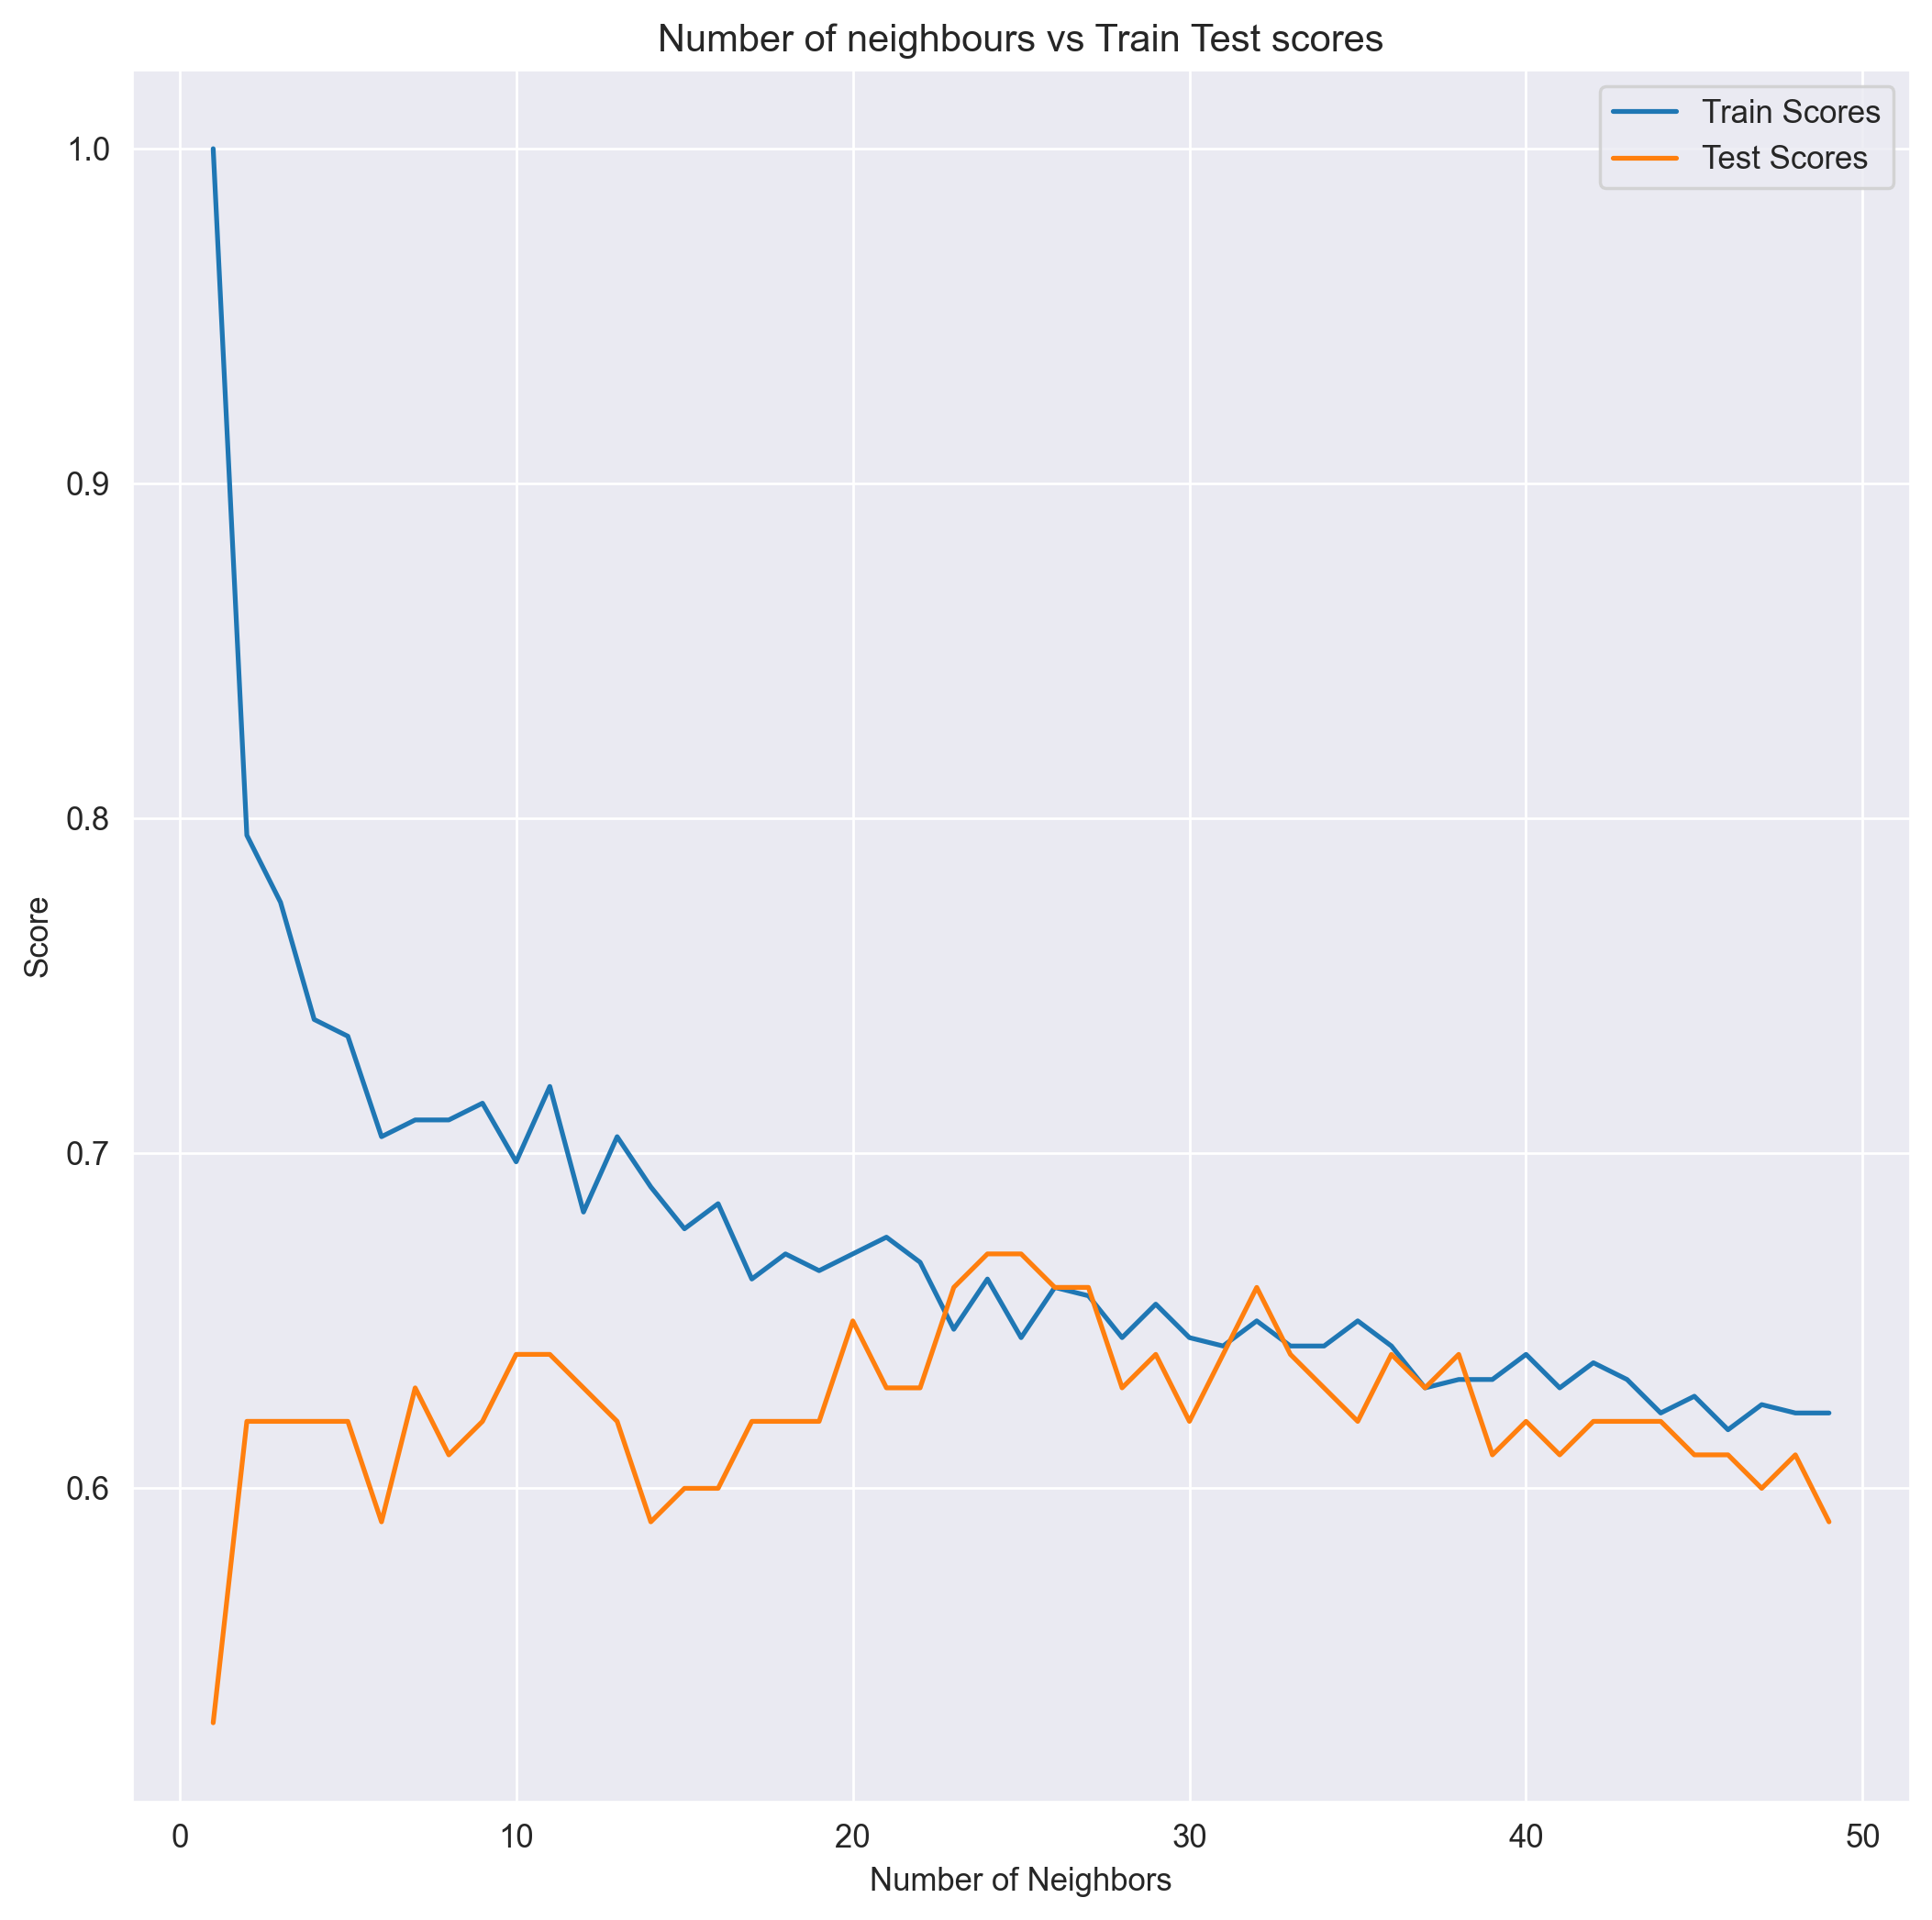

In [148]:
#knn
from sklearn.neighbors import KNeighborsClassifier
X = data.loc[:,'GRE':'Research']
y = data['ChanceCat']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=1)

train_score = []
test_score = []
k = np.arange(1,50)
for i in range(1,50):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
f, ax = plt.subplots(figsize=(10,10), dpi=250)
sns.lineplot(x=k, y=train_score, label='Train Scores')
sns.lineplot(x=k, y=test_score, label ='Test Scores')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Number of neighbours vs Train Test scores")

print("Best accuracy is {} with k = {}".format(np.max(test_score), 1+test_score.index(np.max(test_score))))

Cross-validating in KNN method

In [149]:
#appling cross-validation in KNN

from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(X_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 43}
Best score: 0.6174017132383197


Text(0.5, 1.0, 'Chances of getting admitted')

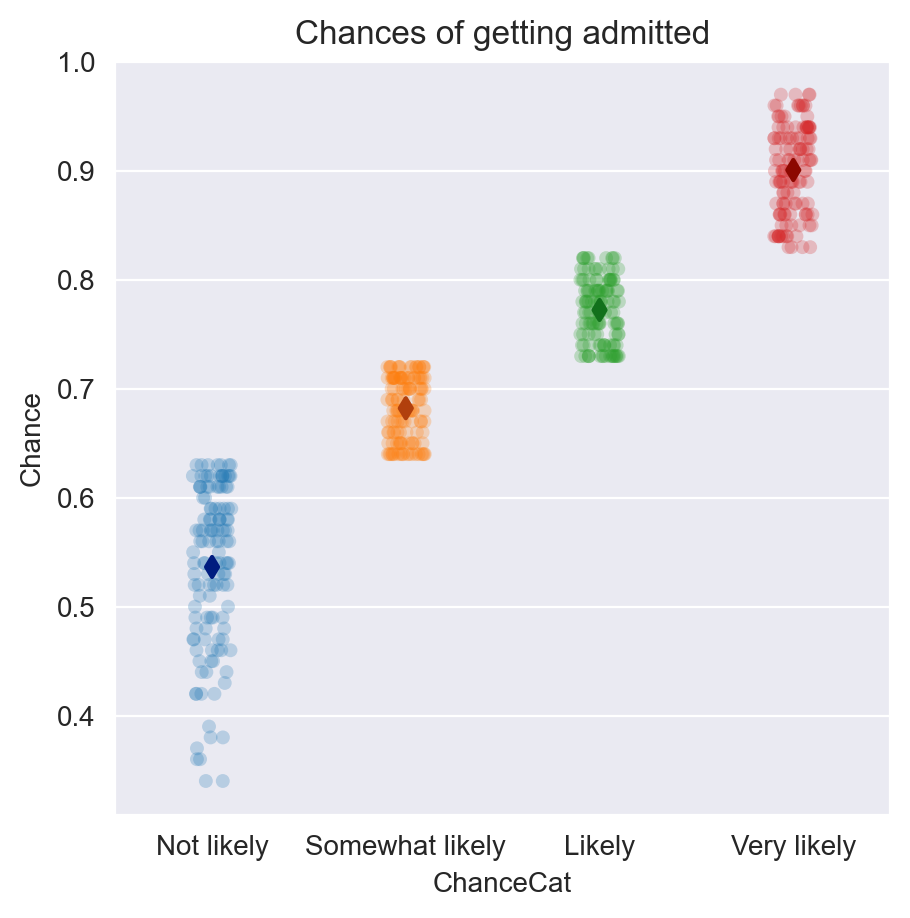

In [150]:
f,ax = plt.subplots(figsize=(5,5), dpi=200)
sns.stripplot(x='ChanceCat', y='Chance', data=data, dodge=True, alpha=0.25, zorder=1, order=['Not likely', 'Somewhat likely', 'Likely', 'Very likely'])
sns.pointplot(x='ChanceCat', y='Chance', data=data, dodge=.523, join=False, palette='dark', markers='d', scale=.75, ci=None, order=['Not likely', 'Somewhat likely', 'Likely', 'Very likely'])
plt.title("Chances of getting admitted")


In [151]:
data.head()

GRE  TOEFL  UniRating  SOP  LOR  CGPA Research  Chance  \
Serial No.                                                           
1           337    118          4  4.5  4.5  9.65        1    0.92   
2           324    107          4  4.0  4.5  8.87        1    0.76   
3           316    104          3  3.0  3.5  8.00        1    0.72   
4           322    110          3  3.5  2.5  8.67        1    0.80   
5           314    103          2  2.0  3.0  8.21        0    0.65   

                  ChanceCat ChanceInt  
Serial No.                             
1               Very likely         1  
2                    Likely         1  
3           Somewhat likely         0  
4                    Likely         1  
5           Somewhat likely         0

Text(0, 0.5, 'Probability')

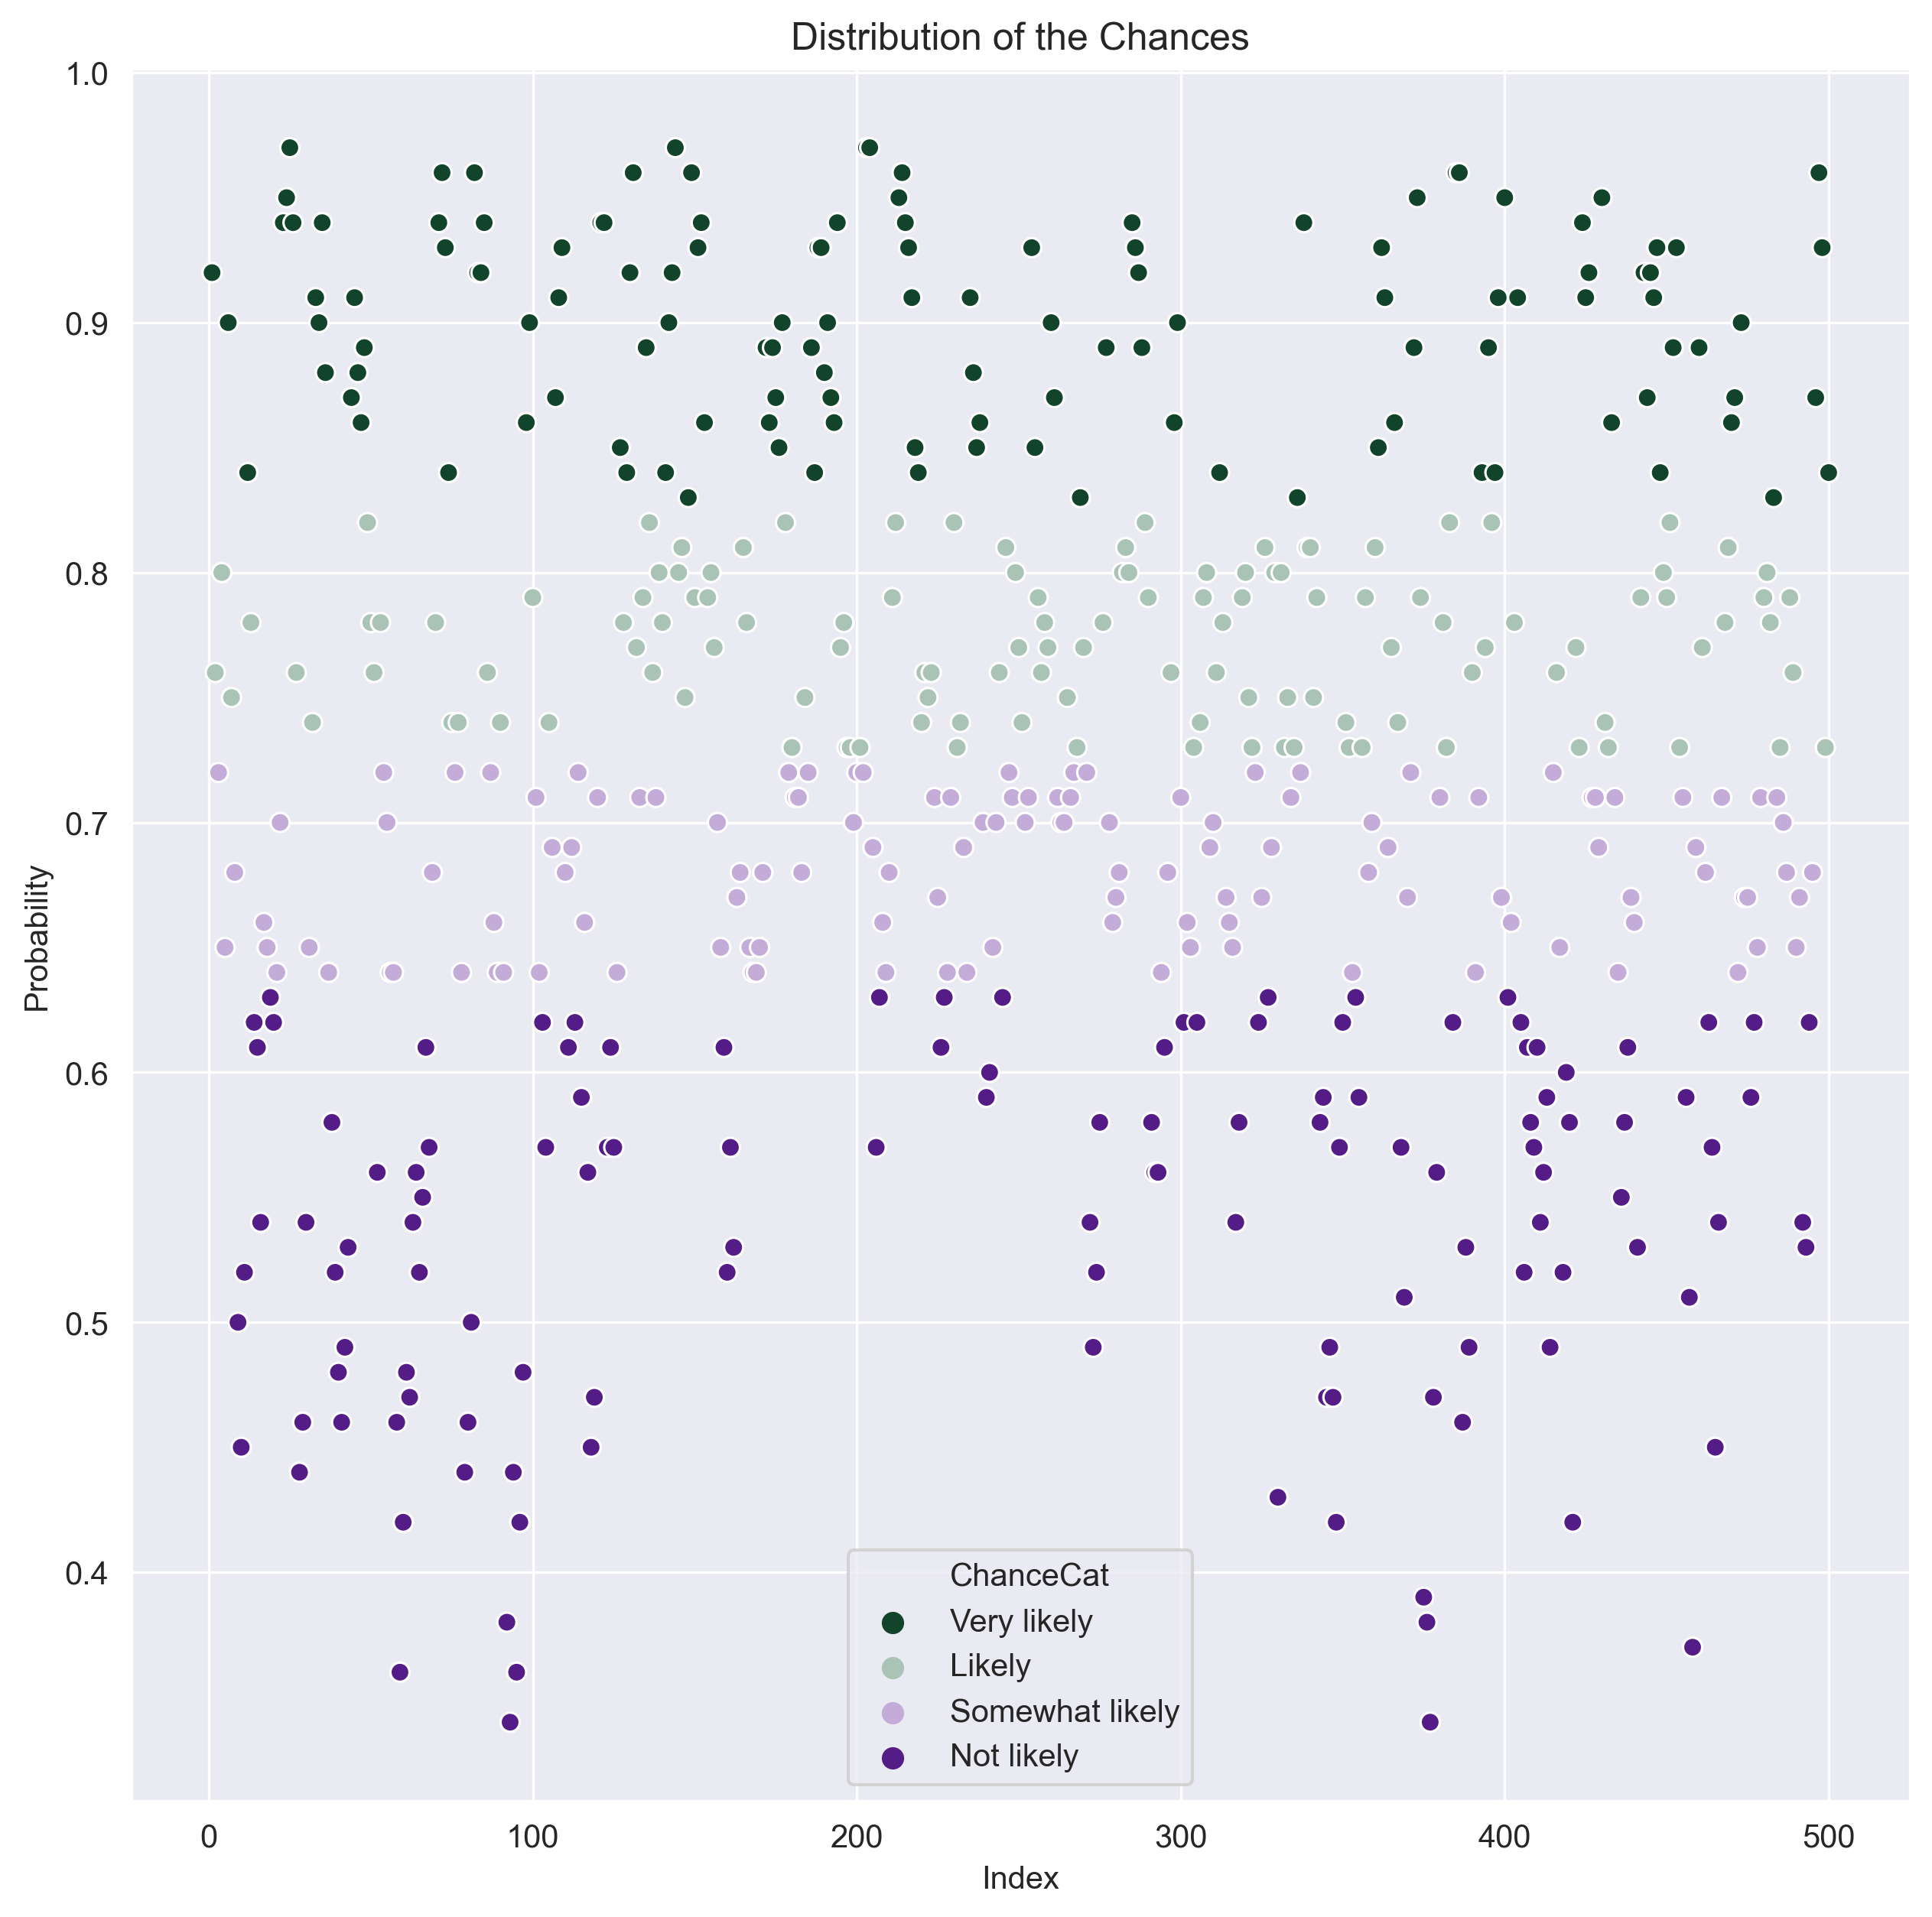

In [152]:
l = np.arange(1,501)
f, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.scatterplot(l,'Chance', data=data, hue='ChanceCat', palette=sns.diverging_palette(145, 280, s=85, l=25, n=4))
plt.title("Distribution of the Chances")
plt.xlabel("Index")
plt.ylabel("Probability")
#color palette = sns.diverging_palette(145, 280, s=85, l=25, n=7)
#sns.cubehelix_palette(4, start=2, rot=0, dark=0, light=.85, reverse=True)

Finding out the significance of features

In [153]:
#Generating feature importance
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
X = data.loc[:,'GRE':'Research']
y = data.loc[:,'Chance']

classifier.fit(X,y)
feature_names = X.columns
impFrame = pd.DataFrame()
impFrame['Features'] = X.columns
impFrame['Importance'] = classifier.feature_importances_
impFrame = impFrame.sort_values(by=['Importance'], ascending=True)

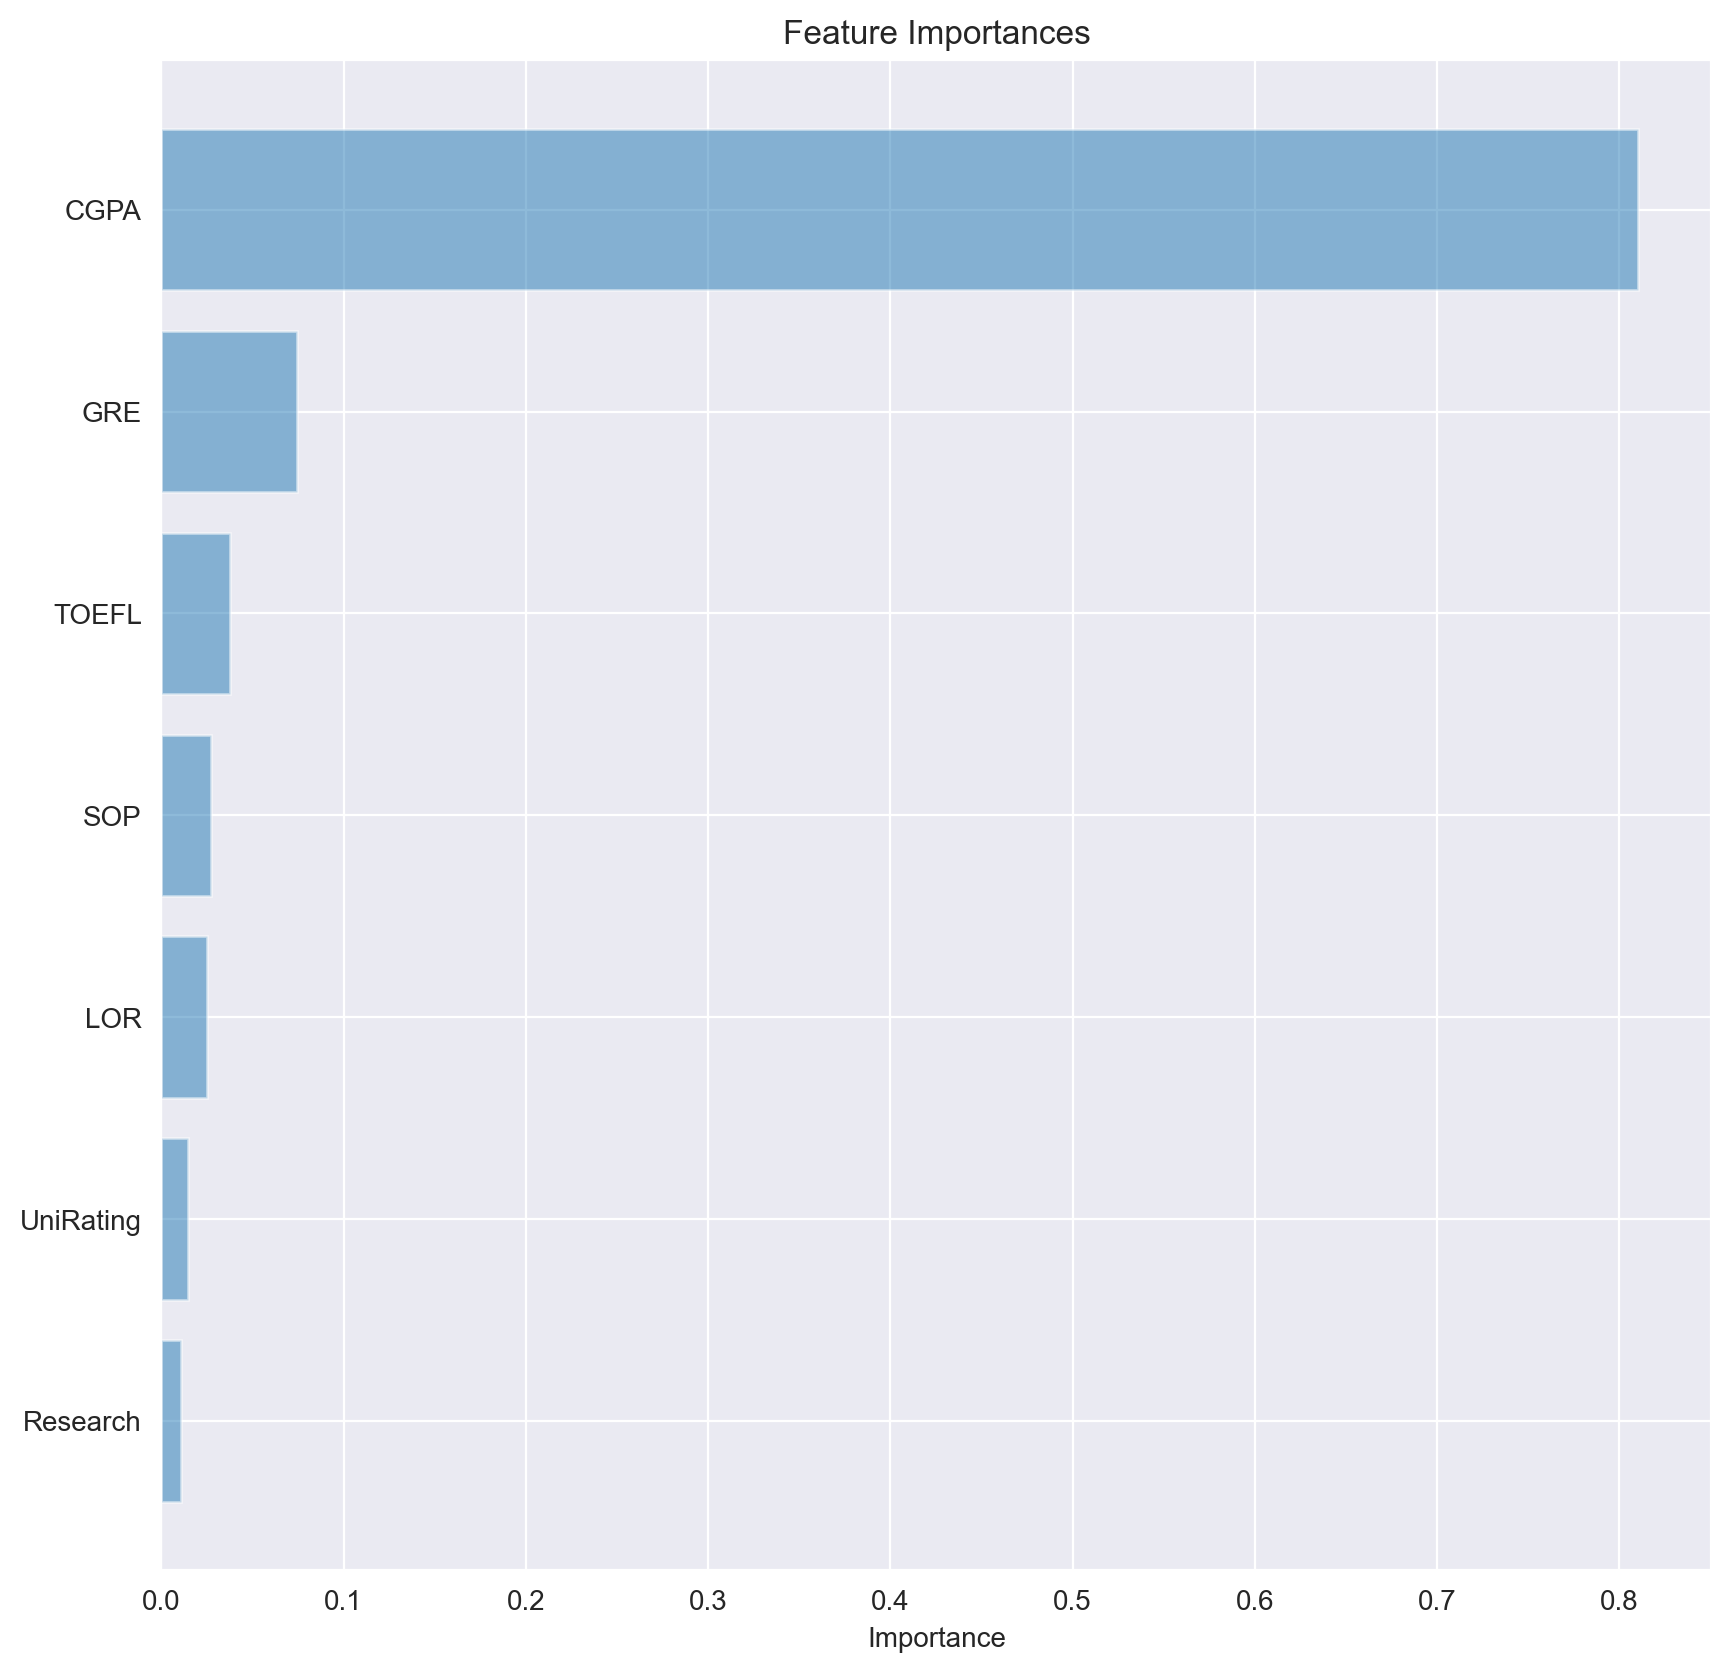

In [154]:
f, ax = plt.subplots(figsize=(10,10), dpi=200)
plt.barh([1,2,3,4,5,6,7], impFrame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], impFrame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Relationship between various features

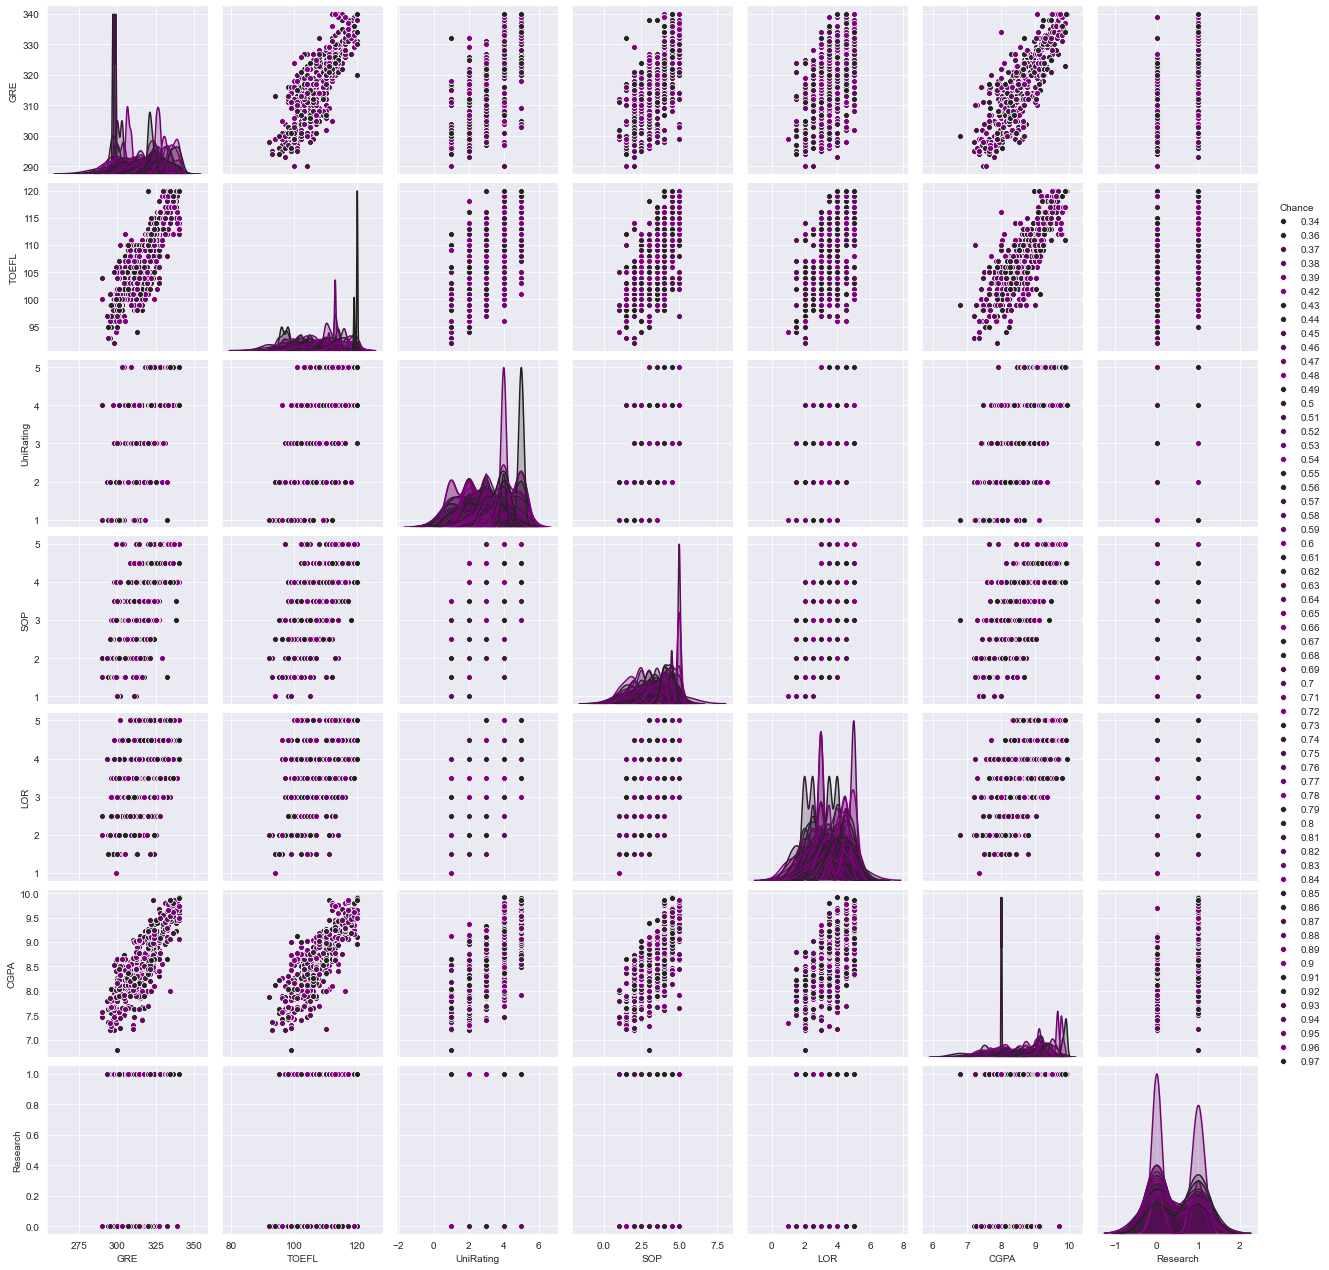

In [155]:
X = data.loc[:,'GRE':'Chance']
sns.pairplot(X, hue='Chance', palette=sns.dark_palette("purple"))

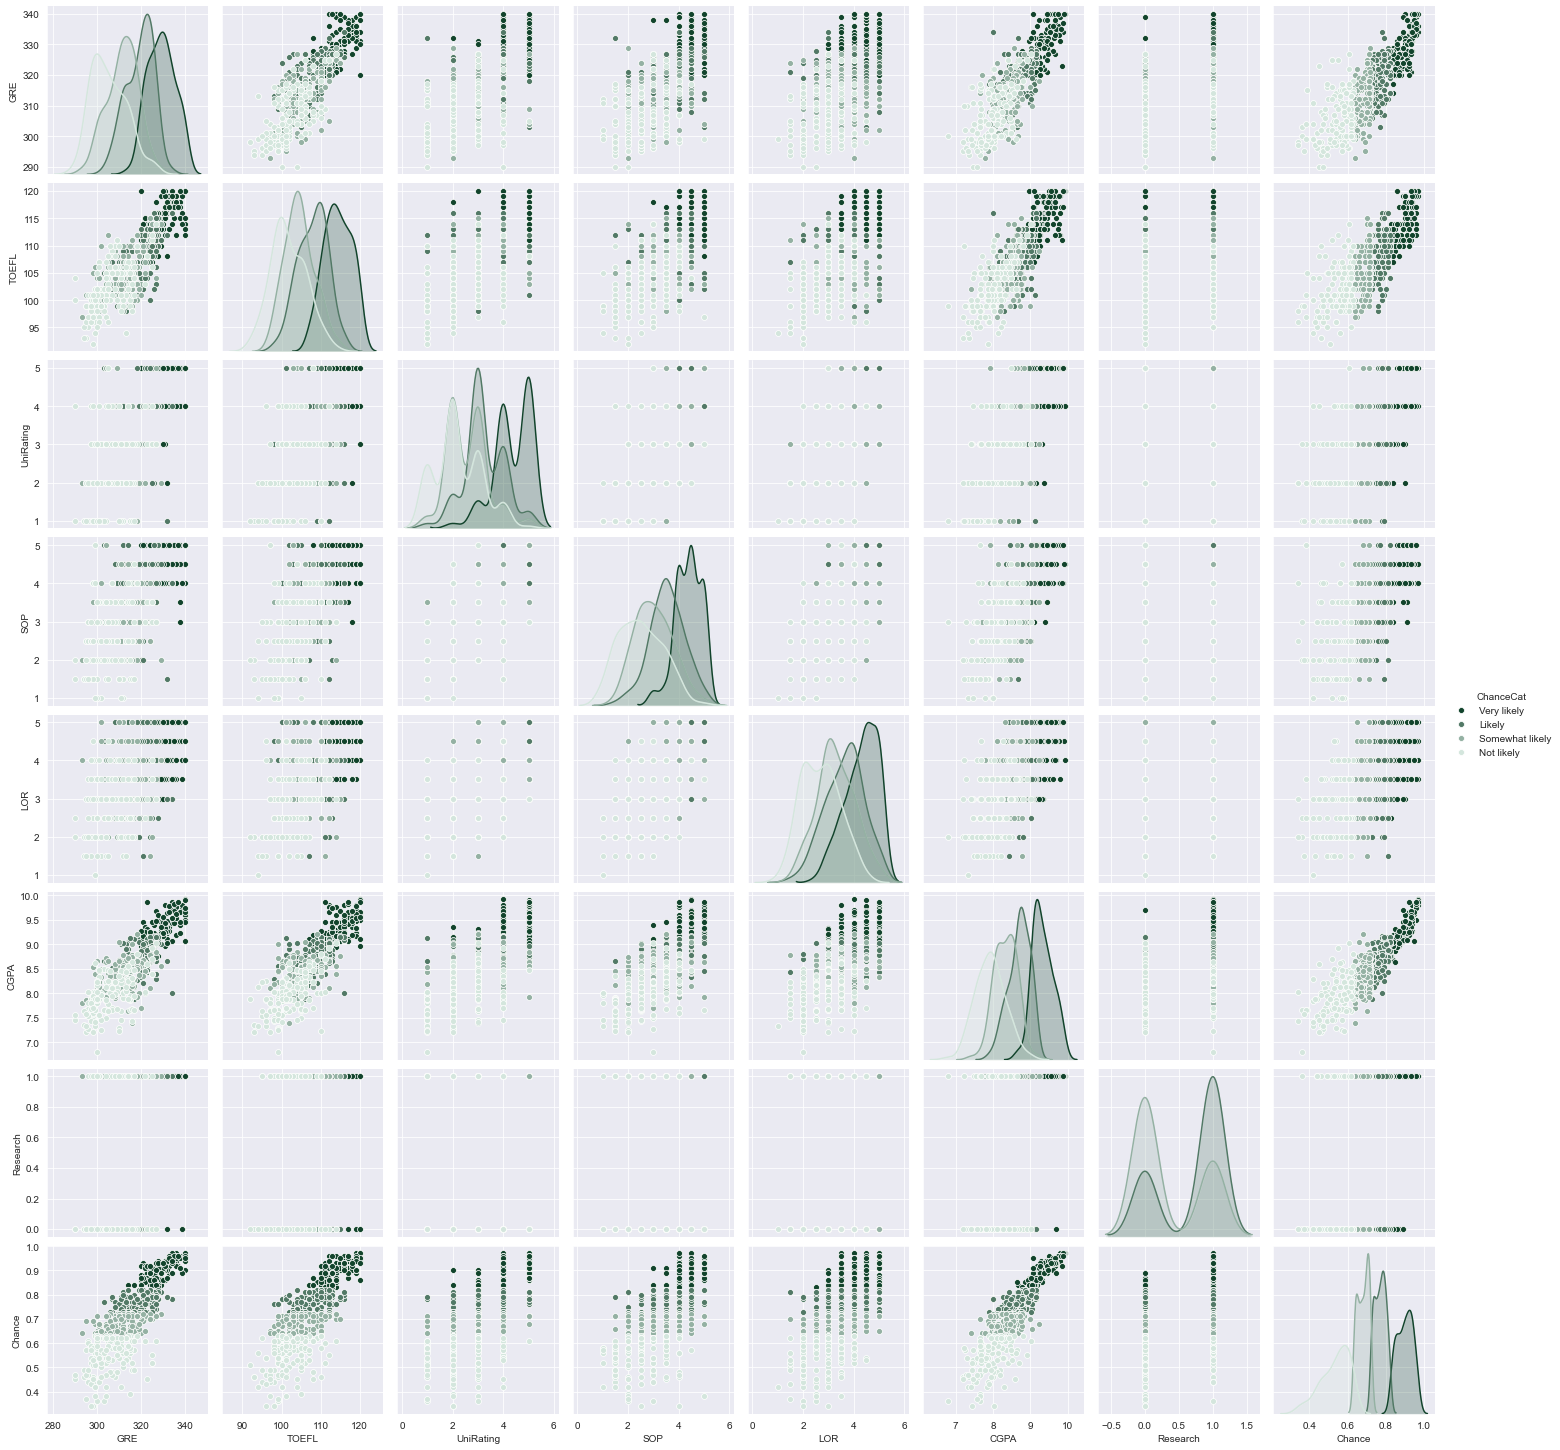

In [156]:
X = data.loc[:,:'ChanceCat']
sns.pairplot(X, hue='ChanceCat', hue_order=['Very likely','Likely','Somewhat likely','Not likely'], palette=sns.diverging_palette(145, 280, s=85, l=25, n=8))

##### Results:

<table>
    <tr>
        <th>Model Name</th>
        <th>R^2 Score</th>
    </tr>
    <tr>
        <td>Linear Regression</td><td>0.898286909853386 </td>
    </tr>
    <tr>
        <td>Linear Regression with 5-fold Cross Validation</td><td>0.8090109217125606</td>
    </tr>
    <tr>
        <td>Ridge Regression wih alpha 1.45</td><td>0.8984857987897976</td>
    </tr>
    <tr>
        <td>Lasso Regression with coefficients [0.00728218 0.00436988 0 0 0 0 0]</td><td>0.7344731754961297</td>
    </tr>
    <tr>
        <td>Logistic Regression for 2 output variables</td><td>0.91</td>
    </tr>
    <tr>
        <td>Logistic Regression for 4 output variables(1 vs All)</td><td>0.55</td>
    </tr>
    <tr>
        <td>K Nearest Neighbours for k=24</td><td>0.67</td>
    </tr>
    <tr>
        <td>K Nearest Neighbours using tuned hyperparameter crossvalidation for k=43</td><td>0.6174017132383197</td>
    </tr>
</table>  

Significance of the features

In [157]:
print(impFrame)

    Features  Importance
6   Research    0.010973
2  UniRating    0.014684
4        LOR    0.024966
3        SOP    0.027327
1      TOEFL    0.037443
0        GRE    0.074573
5       CGPA    0.810034


## Thank you! 

### Suggestions are welcomed!

### :) 